In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Problem Statement:-

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market

In [149]:
df=pd.read_csv('train (1).csv')

In [150]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [151]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[5 rows x 81 columns]

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [153]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [154]:
df.drop(columns=['Alley','Id','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [155]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            120       RL          NaN     4928   Pave      IR1         Lvl   
1             20       RL         95.0    15865   Pave      IR1         Lvl   
2             60       RL         92.0     9920   Pave      IR1         Lvl   
3             20       RL        105.0    11751   Pave      IR1         Lvl   
4             20       RL          NaN    16635   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1163          20       RL          NaN     9819   Pave      IR1         Lvl   
1164          20       RL         67.0     8777   Pave      Reg         Lvl   
1165         160       RL         24.0     2280   Pave      Reg         Lvl   
1166          70  C (all)         50.0     8500   Pave      Reg         Lvl   
1167          60       RL          NaN     7861   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub    Inside       Mod  ...             0         0         224   
2       AllPub   CulDSac       Gtl  ...             0         0           0   
3       AllPub    Inside       Gtl  ...             0         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1163    AllPub    Inside       Gtl  ...             0         0           0   
1164    AllPub    Inside       Gtl  ...             0         0           0   
1165    AllPub       FR2       Gtl  ...             0         0           0   
1166    AllPub    Inside       Gtl  ...           172         0           0   
1167    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2007        WD         Normal    128000  
1           0       0      10    2007        WD         Normal    268000  
2           0       0       6    2007        WD         Normal    269790  
3           0       0       1    2010       COD         Normal    190000  
4           0       0       6    2009        WD         Normal    215000  
...       ...     ...     ...     ...       ...            ...       ...  
1163        0       0       2    2010        WD         Normal    122000  
1164        0       0       5    2009        WD         Normal    108000  
1165        0       0       7    2009        WD         Normal    148500  
1166        0       0       7    2008        WD         Normal     40000  
1167        0       0       6    2006        WD         Normal    183200  

[1168 rows x 76 columns]

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [157]:
from pandas_profiling import ProfileReport


In [158]:
profile=ProfileReport(df,'Housing_price')

In [159]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Observation:-

### 1. MSSubClass has nonzero values having 428 count frequency of 20 values.

### 2. MSZoning having RL count of 928  frequency.

### 3. LotFrontage having 214 missing values also 85 is the highest.

### 4. LotArea  most of the values lies between 7200 to 9200 area and the minimum value is 1300 and maximum is 166448, and the data is highly skewed.

### 5.  Street has mostly one record that is PAVE,ie 1141 so moving forward we have to remove this column.

### 6. LotShape has 760 reg value and 360 IR1 value.

### 7. LandContour has mostly single category value of frequency 1046. Moving forward we have to remove this column.

### 8. Utilities having single value AllPub, moving forward we have to remove this column.

### 9. Lotconfig has high frequency inside.

### 10. Land slope has mostly one value, we have to remove this column.

### 11. Neighborhood has 20 distinct value.

### 12. Condition1 and Condition2 has most of the Frequency as Normal i.e more than 1000 moving forward we have to remove these columns.

### 13. Buldg type has most frequency of 1Fam i.e 930 and House style has 560 1story type frequency.

### 14. Year Built is has most values between 2002 to 2006 year.

### 15. YearRemoveMod has most of the value is 1950.

### 16.  Roof Style has most of the frequency of Gable.

### 17. Roof Malt has 1 value mostly and i.e 1154. Moving forward we have to remove this column.

### 18.  Exterior1 and Exterior2 has most of the value is Vinlysd.

### 19. MasVanArea has most of the value is zero moving forward we have to remove this column.

### 20 ExterQual most of the frequency is TA.

### 21. Extercond most of the frequency is TA moving forward we have to remove this column.Single category contails 1042 frequency.

### 22. Foundation has most of the frequcy of Cblock and Fblock.

### 23. BasementQual has most of the value of TA and GD.

### 24. BasmtCond has be removed has one one frequency TA more than 1000.

### 25. BsmtExposer has most value of NO. BsmtFinType1 has most frequency of UnF and GLQ.

### 26. BsmtSF1 has minmum value of 0 and maximum value 5644.

### 27. BsmtFinType2 and BsmtSF2 has to removed has most of the unique value.

### 28. Heating has to be removed has unique value GasA.

### 29. CentralAir and Electrical has to be removed which has unique value.

### 30. Low QualSF has be removed has most of the value is zero.

### 31. BsmtHalfBath has to be removed has 94% zero values.

### 32. KitchenAbvGr has to be removed, 95% record is 1.

### 33. Functional,GarageQual,GarageCond Paved Drive has to be removed has only single value.

### 34. EnclosedPorch and 3SsnPorch has to be removed maximum frequency lies in 0.

### 35. Screen Porch,Pool Area and Misc Val has to be removed has most of the value is zero.





In [160]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [161]:
df.drop(columns=['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','MasVnrArea',
                'ExterCond','ExterCond','BsmtCond','BsmtFinType2','BsmtFinSF2','Heating','CentralAir','Electrical',
                'LowQualFinSF','KitchenAbvGr','BsmtHalfBath','Functional','GarageQual','PavedDrive','EnclosedPorch',
                '3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

In [162]:
df

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0            120       RL          NaN     4928      IR1    Inside   
1             20       RL         95.0    15865      IR1    Inside   
2             60       RL         92.0     9920      IR1   CulDSac   
3             20       RL        105.0    11751      IR1    Inside   
4             20       RL          NaN    16635      IR1       FR2   
...          ...      ...          ...      ...      ...       ...   
1163          20       RL          NaN     9819      IR1    Inside   
1164          20       RL         67.0     8777      Reg    Inside   
1165         160       RL         24.0     2280      Reg       FR2   
1166          70  C (all)         50.0     8500      Reg    Inside   
1167          60       RL          NaN     7861      IR1    Inside   

     Neighborhood BldgType HouseStyle  OverallQual  ...  GarageCars  \
0         NPkVill   TwnhsE     1Story            6  ...           2   
1           NAmes     1Fam     1Story            8  ...           2   
2         NoRidge     1Fam     2Story            7  ...           2   
3          NWAmes     1Fam     1Story            6  ...           2   
4          NWAmes     1Fam     1Story            6  ...           2   
...           ...      ...        ...          ...  ...         ...   
1163       Sawyer     1Fam     1Story            5  ...           1   
1164      Edwards     1Fam     1Story            4  ...           2   
1165      NPkVill    Twnhs     2Story            6  ...           2   
1166       IDOTRR     1Fam     2Story            4  ...           1   
1167      Gilbert     1Fam     2Story            6  ...           2   

      GarageArea  GarageCond WoodDeckSF OpenPorchSF MoSold YrSold SaleType  \
0            440          TA          0         205      2   2007       WD   
1            621          TA         81         207     10   2007       WD   
2            455          TA        180         130      6   2007       WD   
3            546          TA          0         122      1   2010      COD   
4            529          TA        240           0      6   2009       WD   
...          ...         ...        ...         ...    ...    ...      ...   
1163         280          TA          0           0      2   2010       WD   
1164         520          TA          0          96      5   2009       WD   
1165         440          TA         87           0      7   2009       WD   
1166         250          Fa          0          54      7   2008       WD   
1167         393          TA        100          75      6   2006       WD   

     SaleCondition SalePrice  
0           Normal    128000  
1           Normal    268000  
2           Normal    269790  
3           Normal    190000  
4           Normal    215000  
...            ...       ...  
1163        Normal    122000  
1164        Normal    108000  
1165        Normal    148500  
1166        Normal     40000  
1167        Normal    183200  

[1168 rows x 50 columns]

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   LotShape       1168 non-null   object 
 5   LotConfig      1168 non-null   object 
 6   Neighborhood   1168 non-null   object 
 7   BldgType       1168 non-null   object 
 8   HouseStyle     1168 non-null   object 
 9   OverallQual    1168 non-null   int64  
 10  OverallCond    1168 non-null   int64  
 11  YearBuilt      1168 non-null   int64  
 12  YearRemodAdd   1168 non-null   int64  
 13  RoofStyle      1168 non-null   object 
 14  Exterior1st    1168 non-null   object 
 15  Exterior2nd    1168 non-null   object 
 16  MasVnrType     1161 non-null   object 
 17  ExterQual      1168 non-null   object 
 18  Foundati

In [164]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
LotShape           0
LotConfig          0
Neighborhood       0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
ExterQual          0
Foundation         0
BsmtQual          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageCars         0
GarageArea         0
GarageCond        64
WoodDeckSF         0
OpenPorchSF        0
MoSold             0
YrSold             0
SaleType     

In [165]:
df['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [166]:
df.groupby('FireplaceQu')['Fireplaces'].value_counts()

FireplaceQu  Fireplaces
Ex           1              16
             2               4
             3               1
Fa           1              22
             2               2
             3               1
Gd           1             256
             2              43
             3               2
Po           1              18
TA           1             206
             2              45
             3               1
Name: Fireplaces, dtype: int64

In [167]:
df['FireplaceQu'].isna().sum()

551

In [168]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

In [169]:
df['FireplaceQu'].value_counts()

Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [170]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [171]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       7
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [172]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  ...  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean   1970.930651   1984.758562   444.726027   569.721747  1061.095034  ...   
std      30.145255     20.785185   462.664785   449.375525   442.272249  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000   216.000000   799.000000  ...   
50%    1972.000000   1993.000000   385.500000   474.000000  1005.500000  ...   
75%    2000.000000   2004.000000   714.500000   816.000000  1291.500000  ...   
max    2010.000000   2010.000000  5644.000000  2336.000000  6110.000000  ...   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean       6.542808     0.617295  1978.193841     1.776541   476.860445   
std        1.598484     0.650575    24.198559     0.745554   214.466769   
min        2.000000     0.000000  1900.000000     0.000000     0.000000   
25%        5.000000     0.000000  1962.000000     1.000000   338.000000   
50%        6.000000     1.000000  1978.193841     2.000000   480.000000   
75%        7.000000     1.000000  2001.000000     2.000000   576.000000   
max       14.000000     3.000000  2010.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF       MoSold       YrSold      SalePrice  
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000  
mean     96.206336    46.559932     6.344178  2007.804795  181477.005993  
std     126.158988    66.381023     2.686352     1.329738   79105.586863  
min       0.000000     0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000     0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000    24.000000     6.000000  2008.000000  163995.000000  
75%     171.000000    70.000000     8.000000  2009.000000  215000.000000  
max     857.000000   547.000000    12.000000  2010.000000  755000.000000  

[8 rows x 27 columns]

## Bivariate Analysis

In [173]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

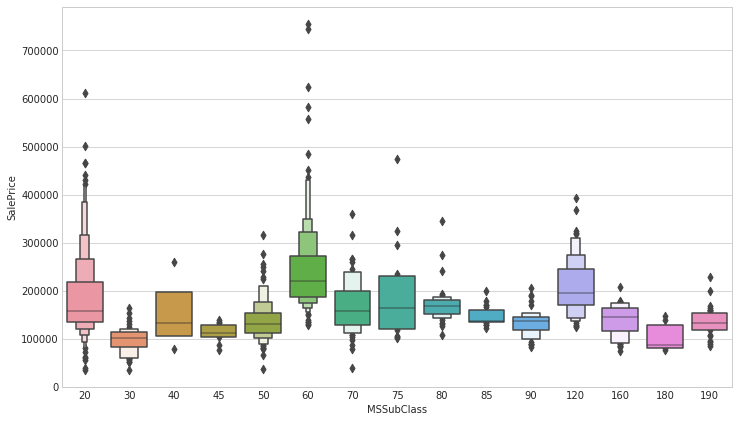

In [174]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,7))
sns.boxenplot(x='MSSubClass',y='SalePrice',data=df)

### Observation:- The price of MSSubClass is high on 60.

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

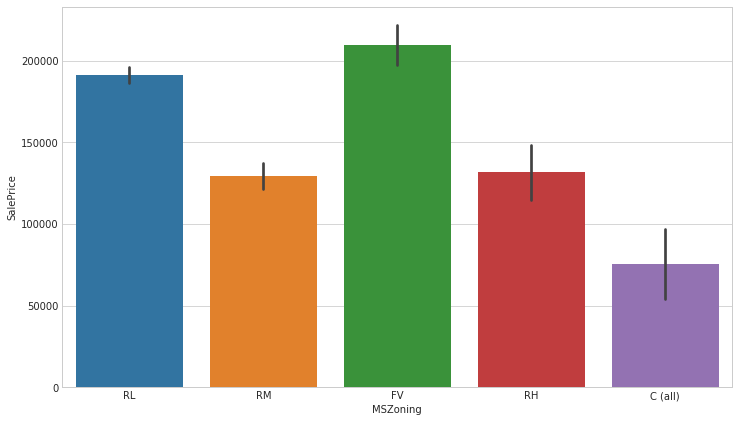

In [175]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,7))
sns.barplot(x='MSZoning',y='SalePrice',data=df)

### Observation:- The price of FV is higher than other classes

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

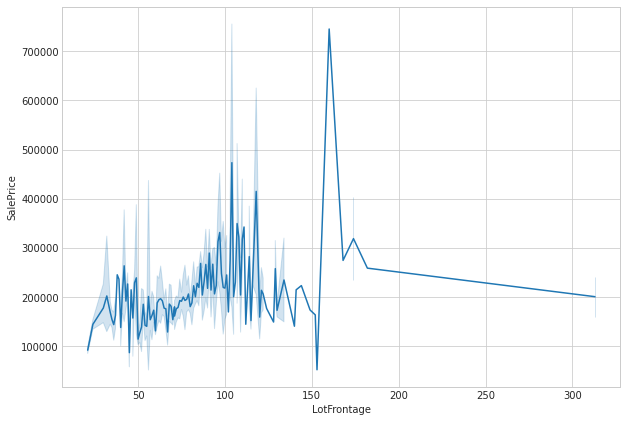

In [176]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
sns.lineplot(x='LotFrontage',y='SalePrice',data=df)

### Observation:- The spike peaks up after 150..So the price is high at that postion

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

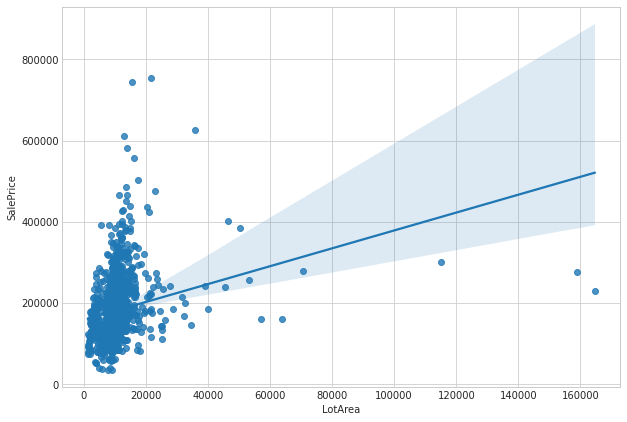

In [177]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
sns.regplot(x='LotArea',y='SalePrice',data=df)

### Observation:- The price is high from area 10000 to 20000

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

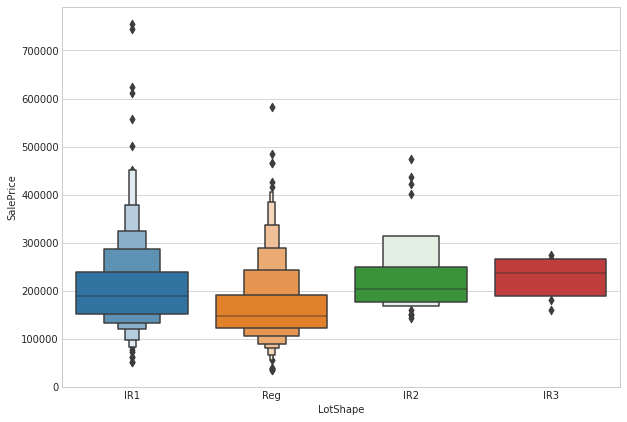

In [178]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
sns.boxenplot(x='LotShape',y='SalePrice',data=df)

### Observation:- On moving from IR1 to further IR3 has more selling price.

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

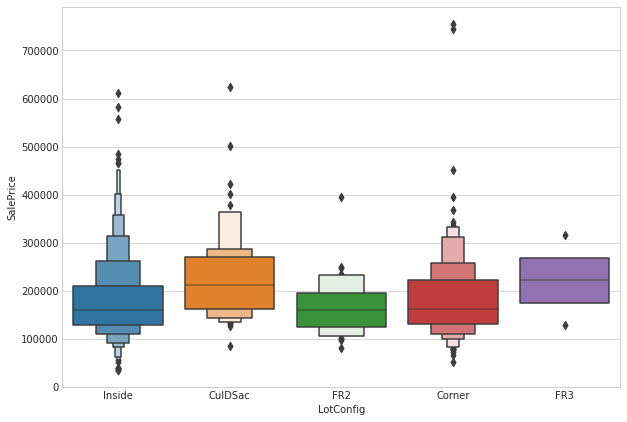

In [179]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='LotConfig',y='SalePrice',data=df)

### Observation:- FR3 has highest selling price.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'NPkVill'),
  Text(1, 0, 'NAmes'),
  Text(2, 0, 'NoRidge'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Gilbert'),
  Text(5, 0, 'Sawyer'),
  Text(6, 0, 'Edwards'),
  Text(7, 0, 'IDOTRR'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'Crawfor'),
  Text(11, 0, 'BrDale'),
  Text(12, 0, 'StoneBr'),
  Text(13, 0, 'BrkSide'),
  Text(14, 0, 'NridgHt'),
  Text(15, 0, 'OldTown'),
  Text(16, 0, 'Somerst'),
  Text(17, 0, 'Timber'),
  Text(18, 0, 'SWISU'),
  Text(19, 0, 'SawyerW'),
  Text(20, 0, 'ClearCr'),
  Text(21, 0, 'Veenker'),
  Text(22, 0, 'Blmngtn'),
  Text(23, 0, 'MeadowV'),
  Text(24, 0, 'Blueste')])

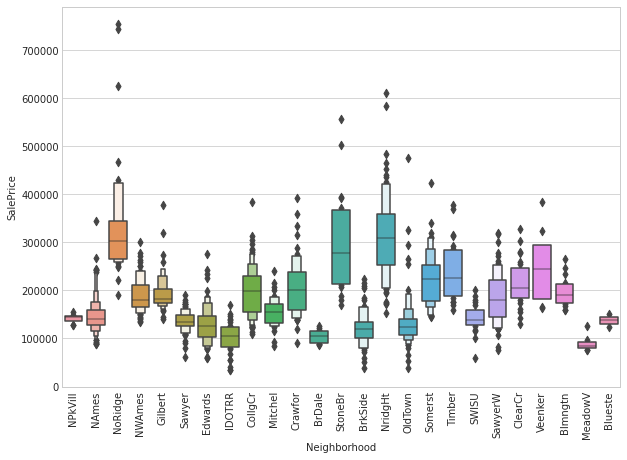

In [180]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='Neighborhood',y='SalePrice',data=df)
plt.xticks(rotation=90)

### Observation:- Nridght has higher price.


<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

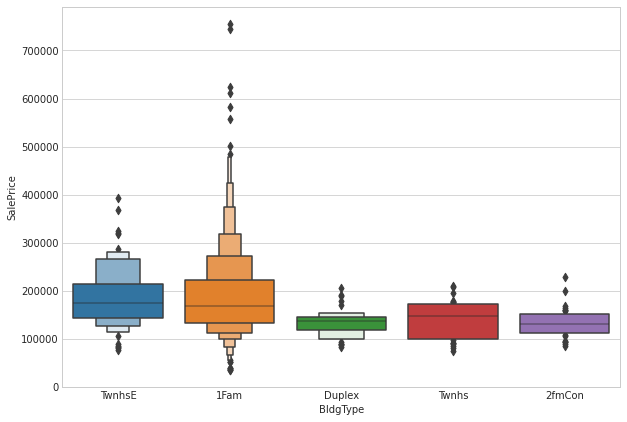

In [181]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='BldgType',y='SalePrice',data=df)


### observation:- 1Fam buiding type has higher price

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

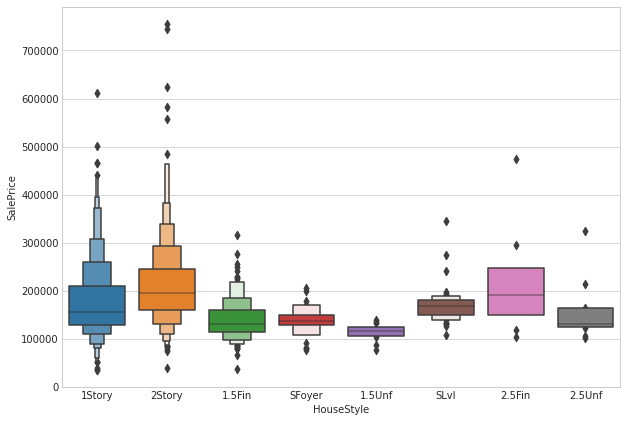

In [182]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='HouseStyle',y='SalePrice',data=df)


### Observation:- 2.5Fin housestyle has highest selling price.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

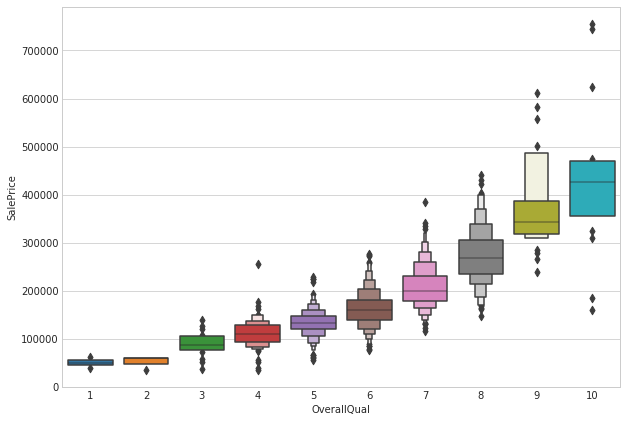

In [183]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='OverallQual',y='SalePrice',data=df)


### Observation:- As overallQual increases the price of house increases

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

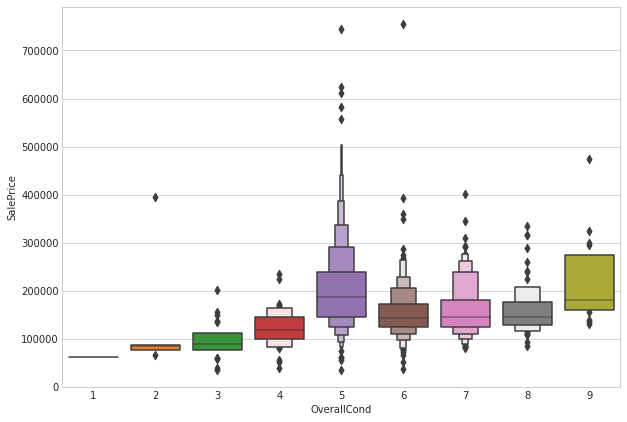

In [184]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='OverallCond',y='SalePrice',data=df)


### Observation:- As overall condition increases the price of house increases

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

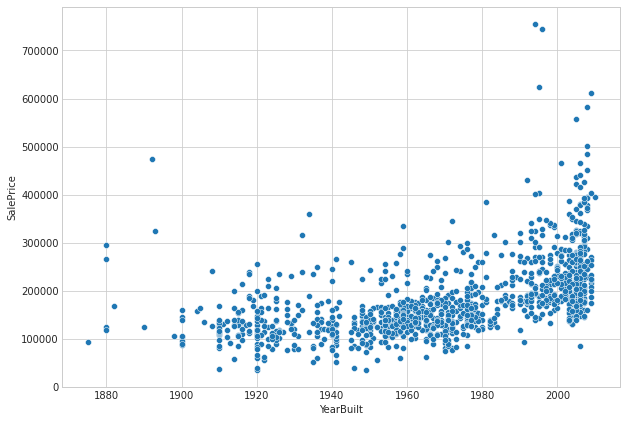

In [185]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='YearBuilt',y='SalePrice',data=df)


### Observation:- Clearly it is showing that in house built in year 2000 has more price than previous years

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

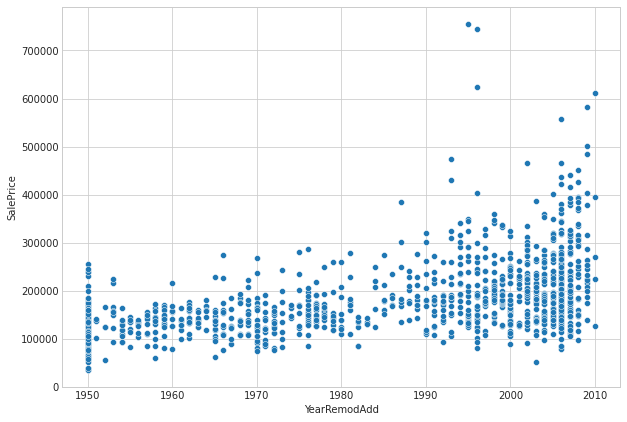

In [186]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='YearRemodAdd',y='SalePrice',data=df)


### Observation:- The YearRemodAdd between 2000 to 2010 has high selling price value

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

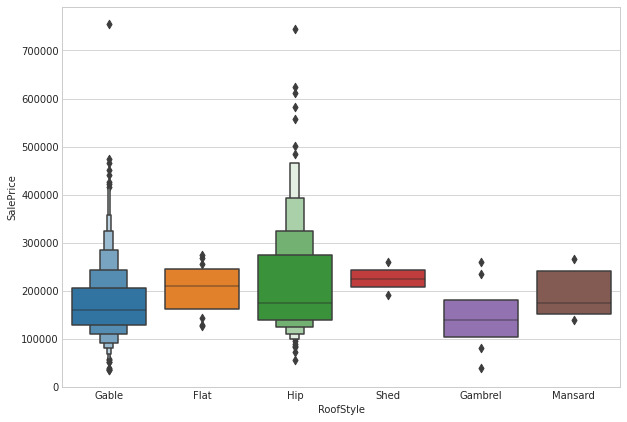

In [187]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='RoofStyle',y='SalePrice',data=df)


### Observation:- Shed Roof style has highest selling price value

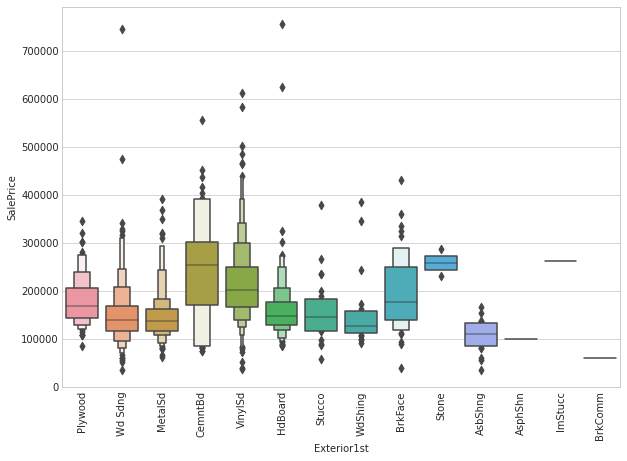

In [188]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='Exterior1st',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- CemntBd Exterior1st has high selling price value.

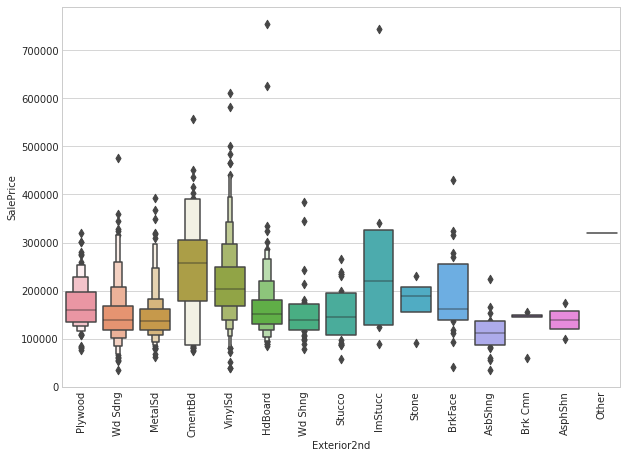

In [189]:

plt.figure(figsize=(10,7))
sns.boxenplot(x='Exterior2nd',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()



### Observation:- Exterior 2nd has cemntbd has high selling price.

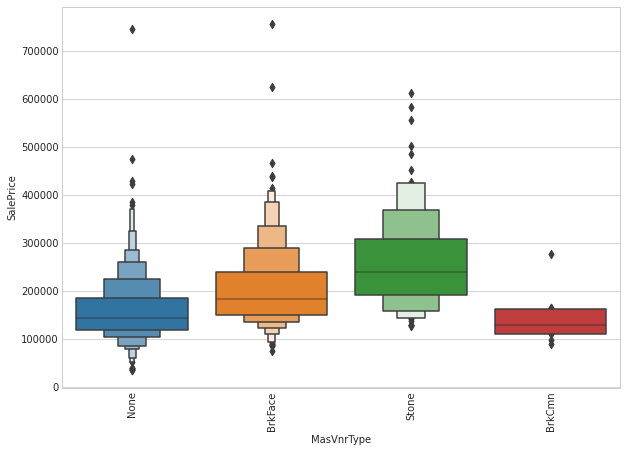

In [190]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='MasVnrType',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- MassVanType stone has highest selling price

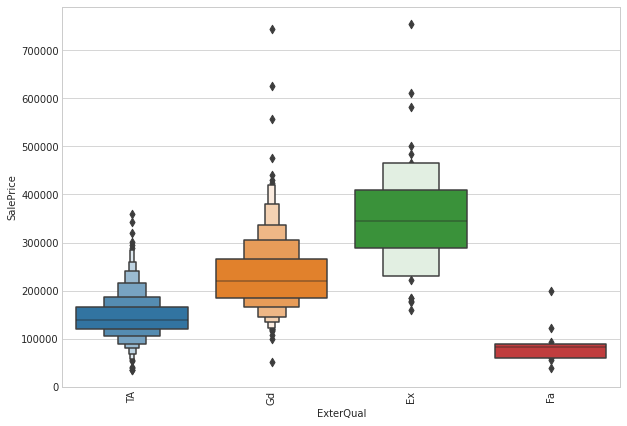

In [191]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='ExterQual',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Ex has highest selling price in ExterQual

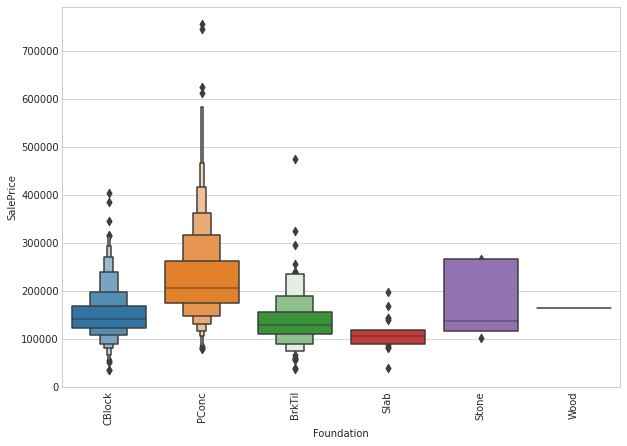

In [192]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='Foundation',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- PConc has highest selling price value in Foundation.

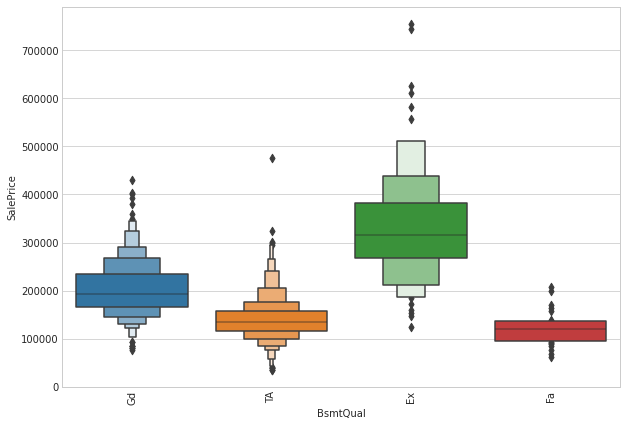

In [193]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='BsmtQual',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- BsmtQual Ex has highest selling price value

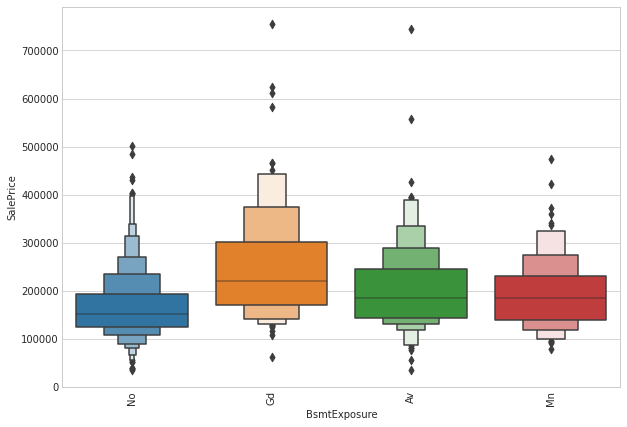

In [194]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='BsmtExposure',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Bsmt Exposer Gd has highest selling price value

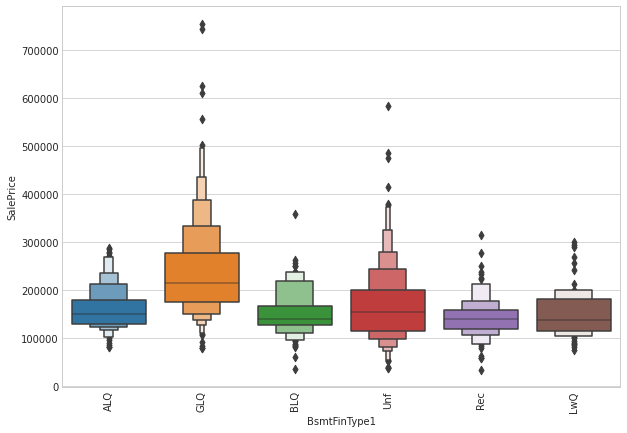

In [195]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='BsmtFinType1',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


###  observation:-BsmntFinType1,BLQ has highest selling price value  

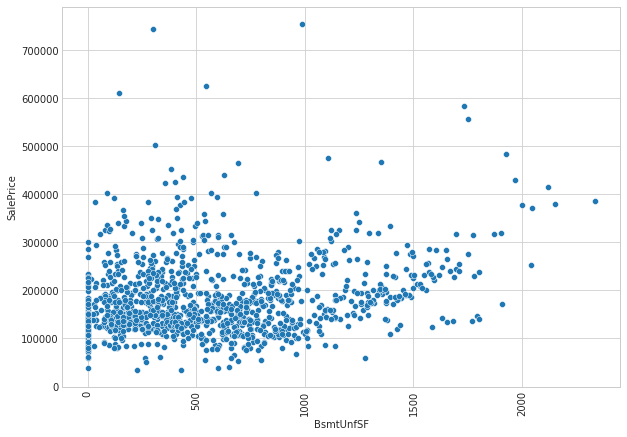

In [196]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='BsmtUnfSF',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- As BsmtUnfSF increases the selling price increases

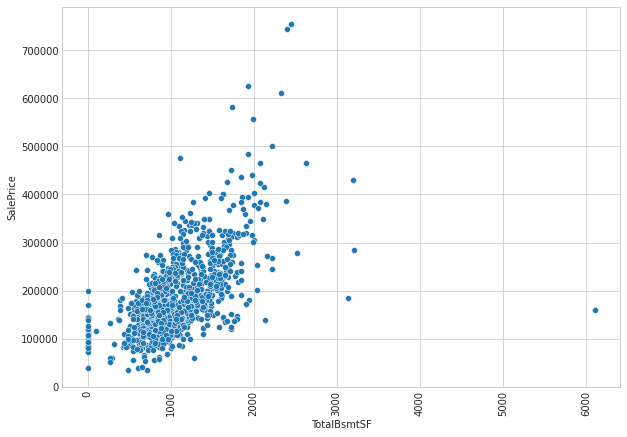

In [197]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:-TotalBsmnt is showing linear relationship with selling price except some outliers

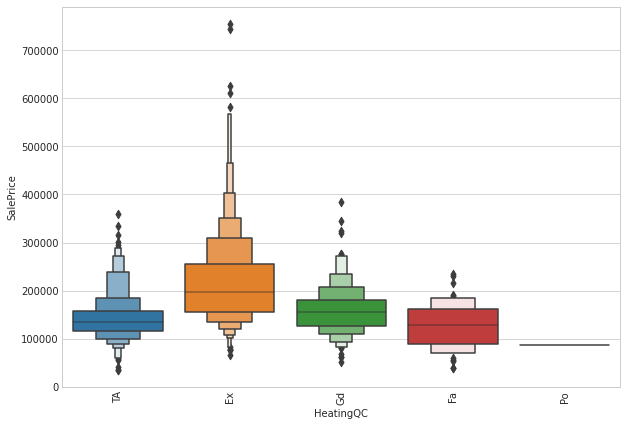

In [198]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='HeatingQC',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- HeatingQC Ex has highest selling price value.

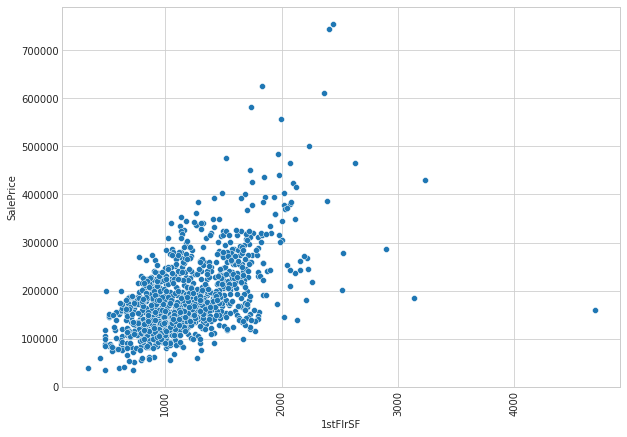

In [199]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- 1stFlrSF is linearly showing the increase in selling price.

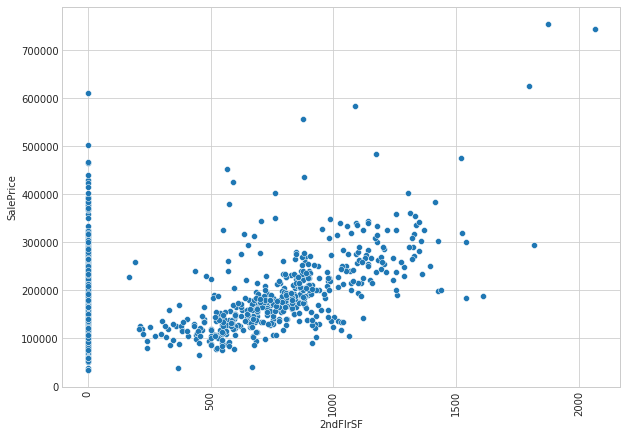

In [200]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='2ndFlrSF',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Most of 2ndFlrSf lies in 0 but for other frequency the selling price linearly increases

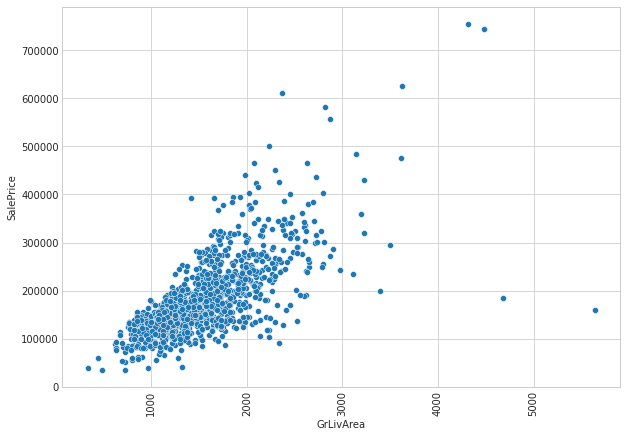

In [201]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- There is linear relationship in GrLivArea and selling price

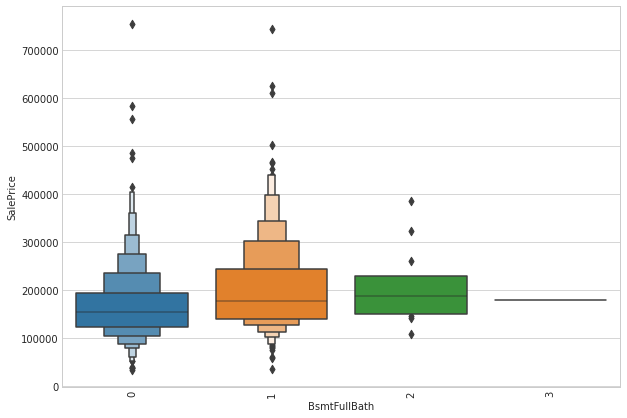

In [202]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='BsmtFullBath',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- BsmtFullBath 2 has higher selling price

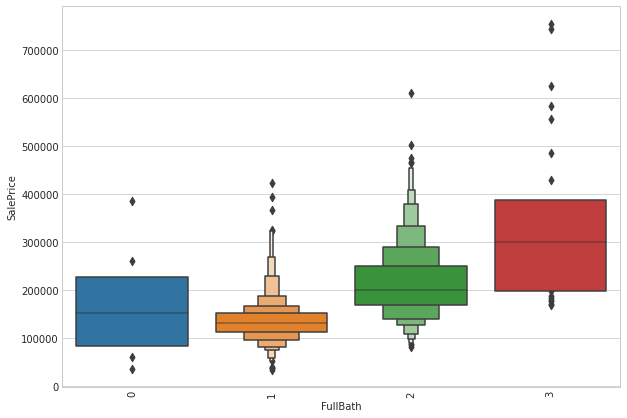

In [203]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='FullBath',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Full 3 has higher selling price 

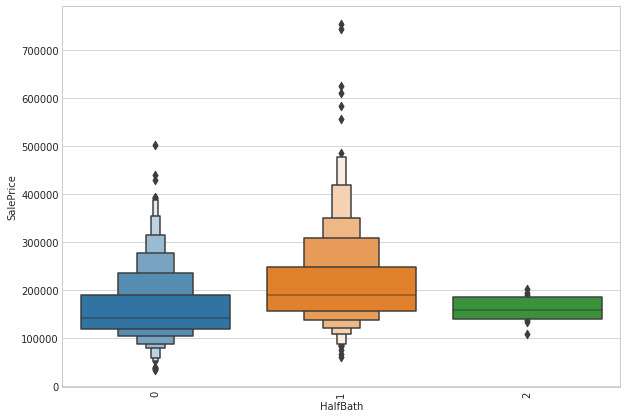

In [204]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='HalfBath',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Half bath 1 has higher selling price

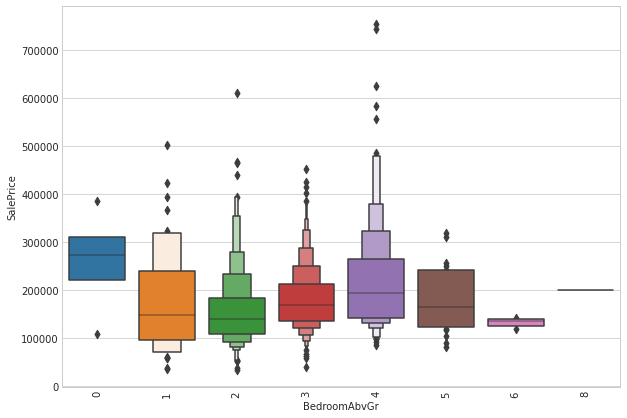

In [205]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='BedroomAbvGr',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- BedroomAdvGr 0 has higher selling price

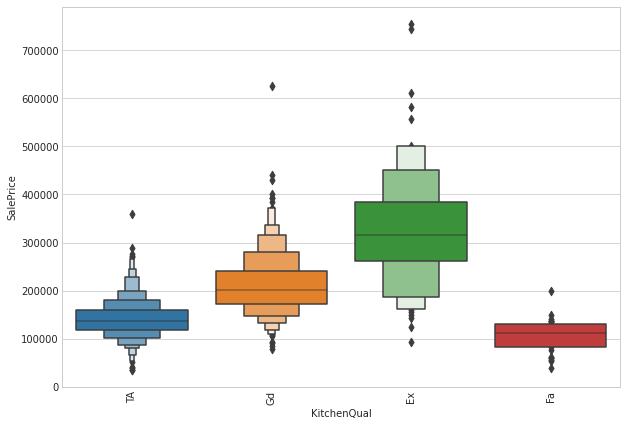

In [206]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='KitchenQual',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Ex KitchenQual higher selling price value

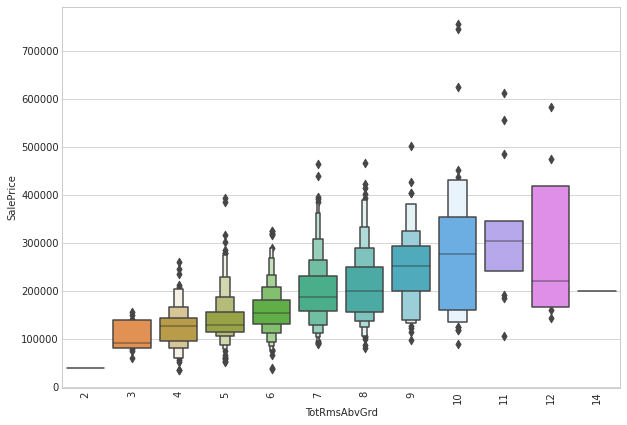

In [207]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='TotRmsAbvGrd',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Total rooms 11 has higher selling price value

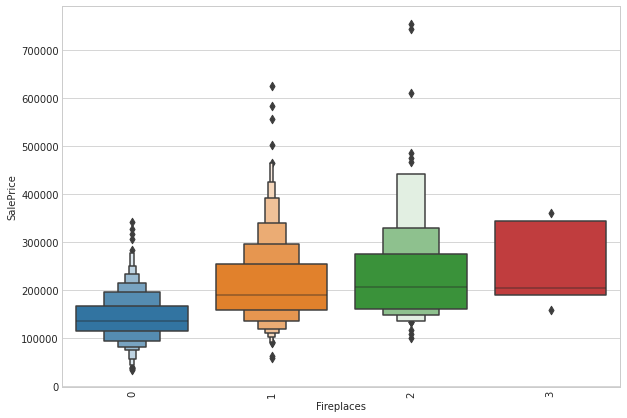

In [208]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='Fireplaces',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Fire place 3 has higher selling price

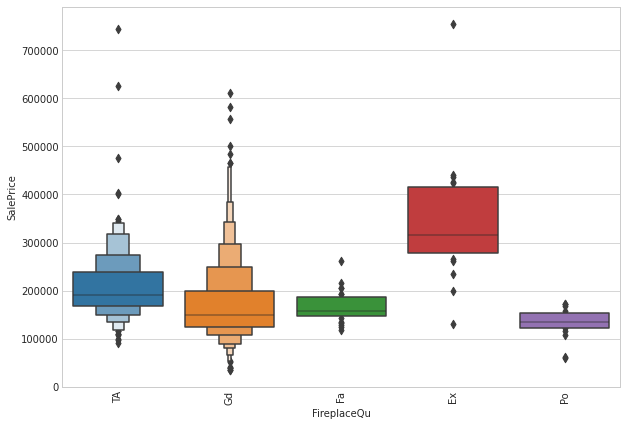

In [209]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='FireplaceQu',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Ex FireplaceQu has higher selling price value

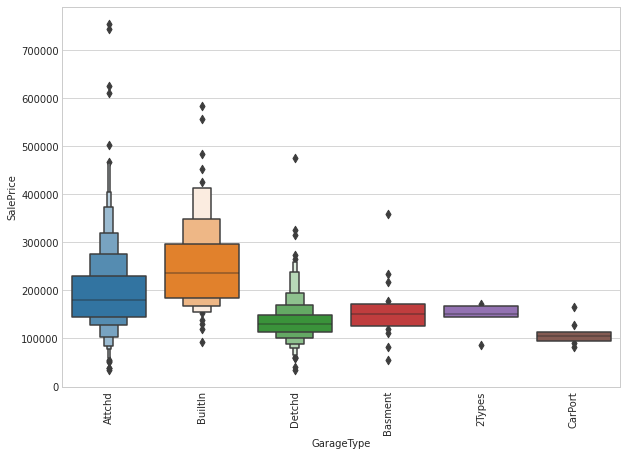

In [210]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='GarageType',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Garage type Builtin has higher selling price value

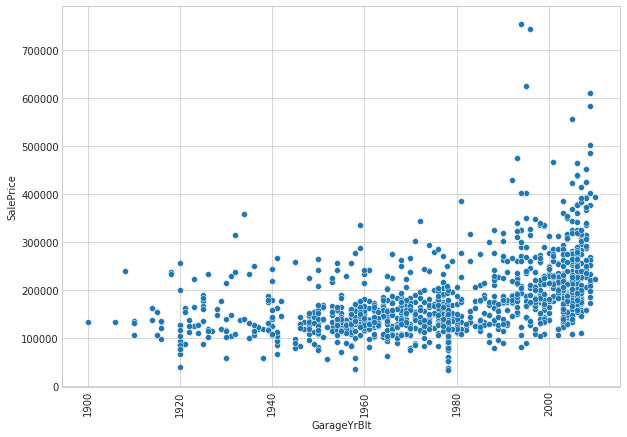

In [211]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='GarageYrBlt',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- GarageYrBlt in 2000 has higher selling price 

In [212]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

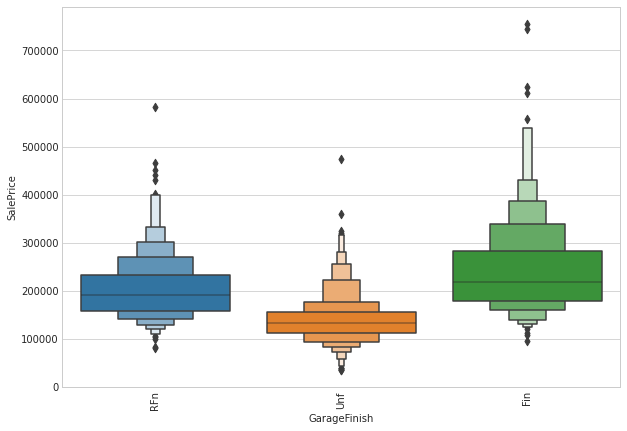

In [213]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='GarageFinish',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Garage finish through Fin has higher selling price

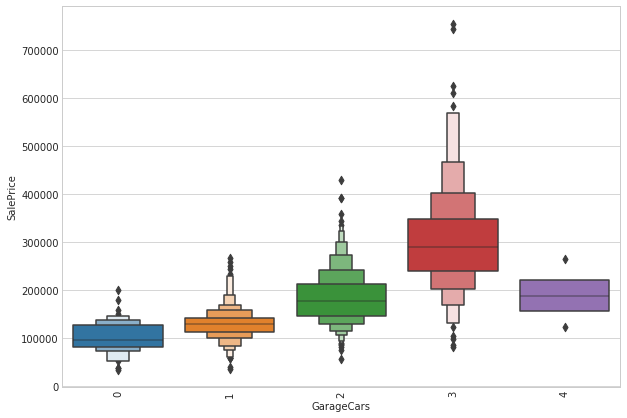

In [214]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='GarageCars',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- The garage cars having 3 value has higher selling price

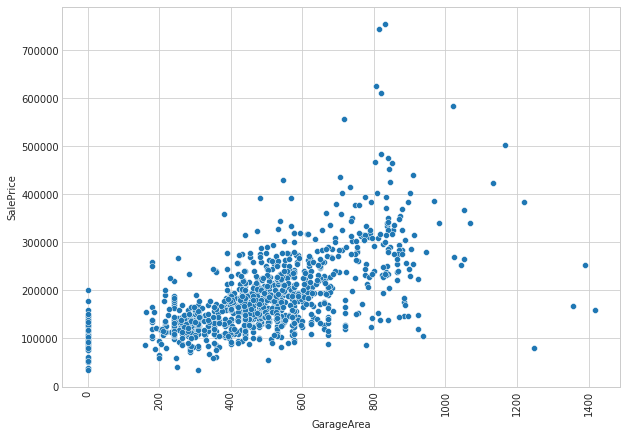

In [215]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='GarageArea',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- The Garage Area increases the selling price also increases

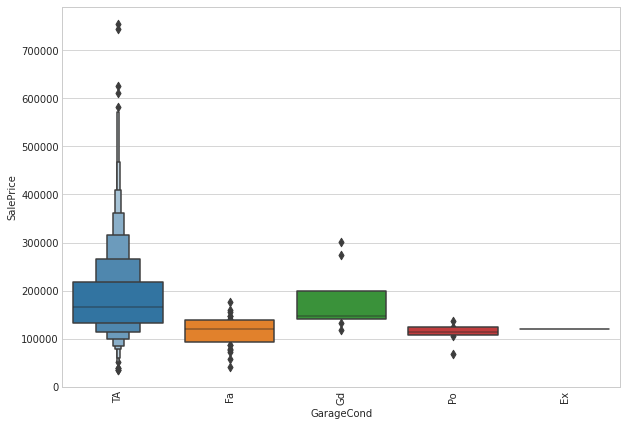

In [216]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='GarageCond',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- The garage cond TA has higher selling price

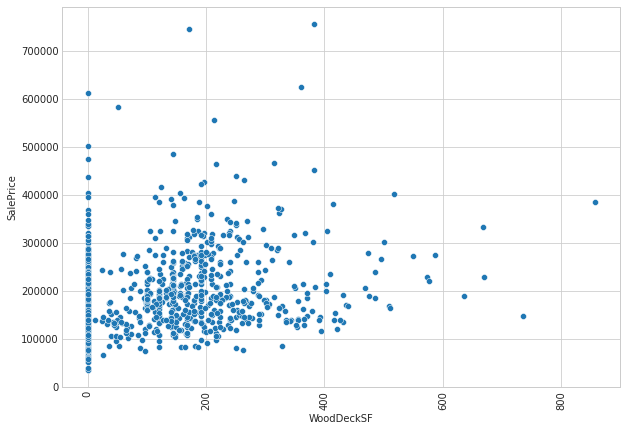

In [217]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='WoodDeckSF',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- The woodenDeck SF has linear relation except some points lies on 0.

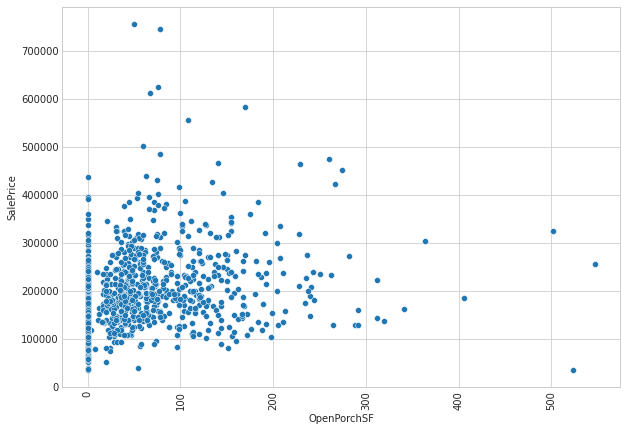

In [218]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- The price increase from 0 to 100.

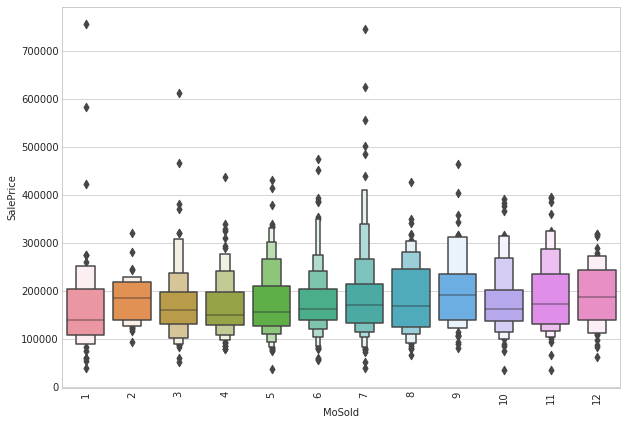

In [219]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='MoSold',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- The MO sold of 12 has higher value of selling price

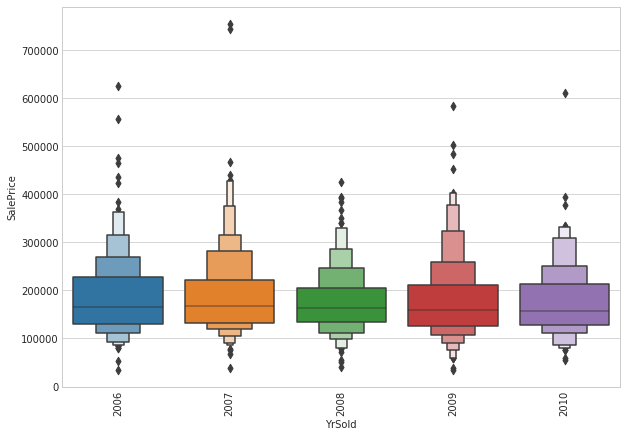

In [220]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='YrSold',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


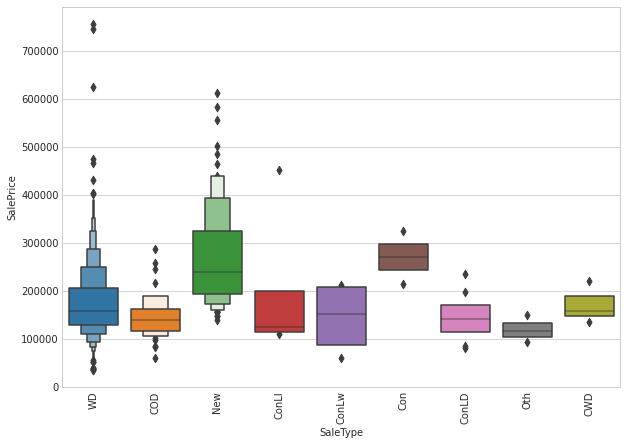

In [221]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='SaleType',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:- Con sale type has higher selling price

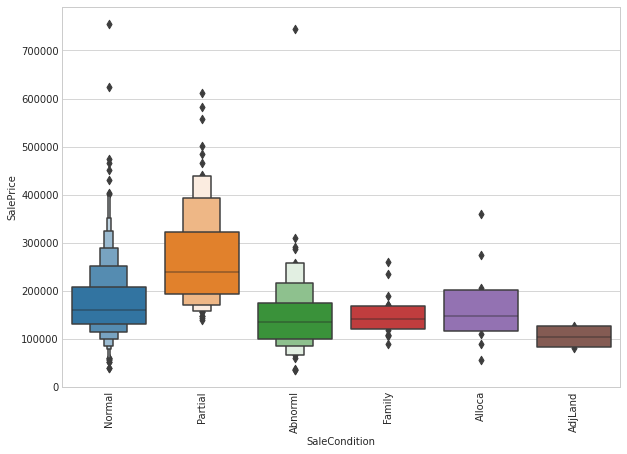

In [222]:
plt.figure(figsize=(10,7))
sns.boxenplot(x='SaleCondition',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()


### Observation:-  Partial sale condition has higher selling value.


In [223]:
cat=[]
for col in df:
    if df[col].dtypes=='object':
        cat.append(col)

In [224]:
print(cat)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'SaleType', 'SaleCondition']


In [225]:
## Encoding categorial variable
from sklearn.preprocessing import LabelEncoder

In [226]:
le=LabelEncoder()

In [227]:
df[cat]=df[cat].apply(le.fit_transform)

In [228]:
df

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
0            120         3     70.98847     4928         0          4   
1             20         3     95.00000    15865         0          4   
2             60         3     92.00000     9920         0          1   
3             20         3    105.00000    11751         0          4   
4             20         3     70.98847    16635         0          2   
...          ...       ...          ...      ...       ...        ...   
1163          20         3     70.98847     9819         0          4   
1164          20         3     67.00000     8777         3          4   
1165         160         3     24.00000     2280         3          2   
1166          70         0     50.00000     8500         3          4   
1167          60         3     70.98847     7861         0          4   

      Neighborhood  BldgType  HouseStyle  OverallQual  ...  GarageCars  \
0               13         4           2            6  ...           2   
1               12         0           2            8  ...           2   
2               15         0           5            7  ...           2   
3               14         0           2            6  ...           2   
4               14         0           2            6  ...           2   
...            ...       ...         ...          ...  ...         ...   
1163            19         0           2            5  ...           1   
1164             7         0           2            4  ...           2   
1165            13         3           5            6  ...           2   
1166             9         0           5            4  ...           1   
1167             8         0           5            6  ...           2   

      GarageArea  GarageCond  WoodDeckSF  OpenPorchSF  MoSold  YrSold  \
0            440           4           0          205       2    2007   
1            621           4          81          207      10    2007   
2            455           4         180          130       6    2007   
3            546           4           0          122       1    2010   
4            529           4         240            0       6    2009   
...          ...         ...         ...          ...     ...     ...   
1163         280           4           0            0       2    2010   
1164         520           4           0           96       5    2009   
1165         440           4          87            0       7    2009   
1166         250           1           0           54       7    2008   
1167         393           4         100           75       6    2006   

      SaleType  SaleCondition  SalePrice  
0            8              4     128000  
1            8              4     268000  
2            8              4     269790  
3            0              4     190000  
4            8              4     215000  
...        ...            ...        ...  
1163         8              4     122000  
1164         8              4     108000  
1165         8              4     148500  
1166         8              4      40000  
1167         8              4     183200  

[1168 rows x 50 columns]

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   int64  
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   LotShape       1168 non-null   int64  
 5   LotConfig      1168 non-null   int64  
 6   Neighborhood   1168 non-null   int64  
 7   BldgType       1168 non-null   int64  
 8   HouseStyle     1168 non-null   int64  
 9   OverallQual    1168 non-null   int64  
 10  OverallCond    1168 non-null   int64  
 11  YearBuilt      1168 non-null   int64  
 12  YearRemodAdd   1168 non-null   int64  
 13  RoofStyle      1168 non-null   int64  
 14  Exterior1st    1168 non-null   int64  
 15  Exterior2nd    1168 non-null   int64  
 16  MasVnrType     1168 non-null   int64  
 17  ExterQual      1168 non-null   int64  
 18  Foundati

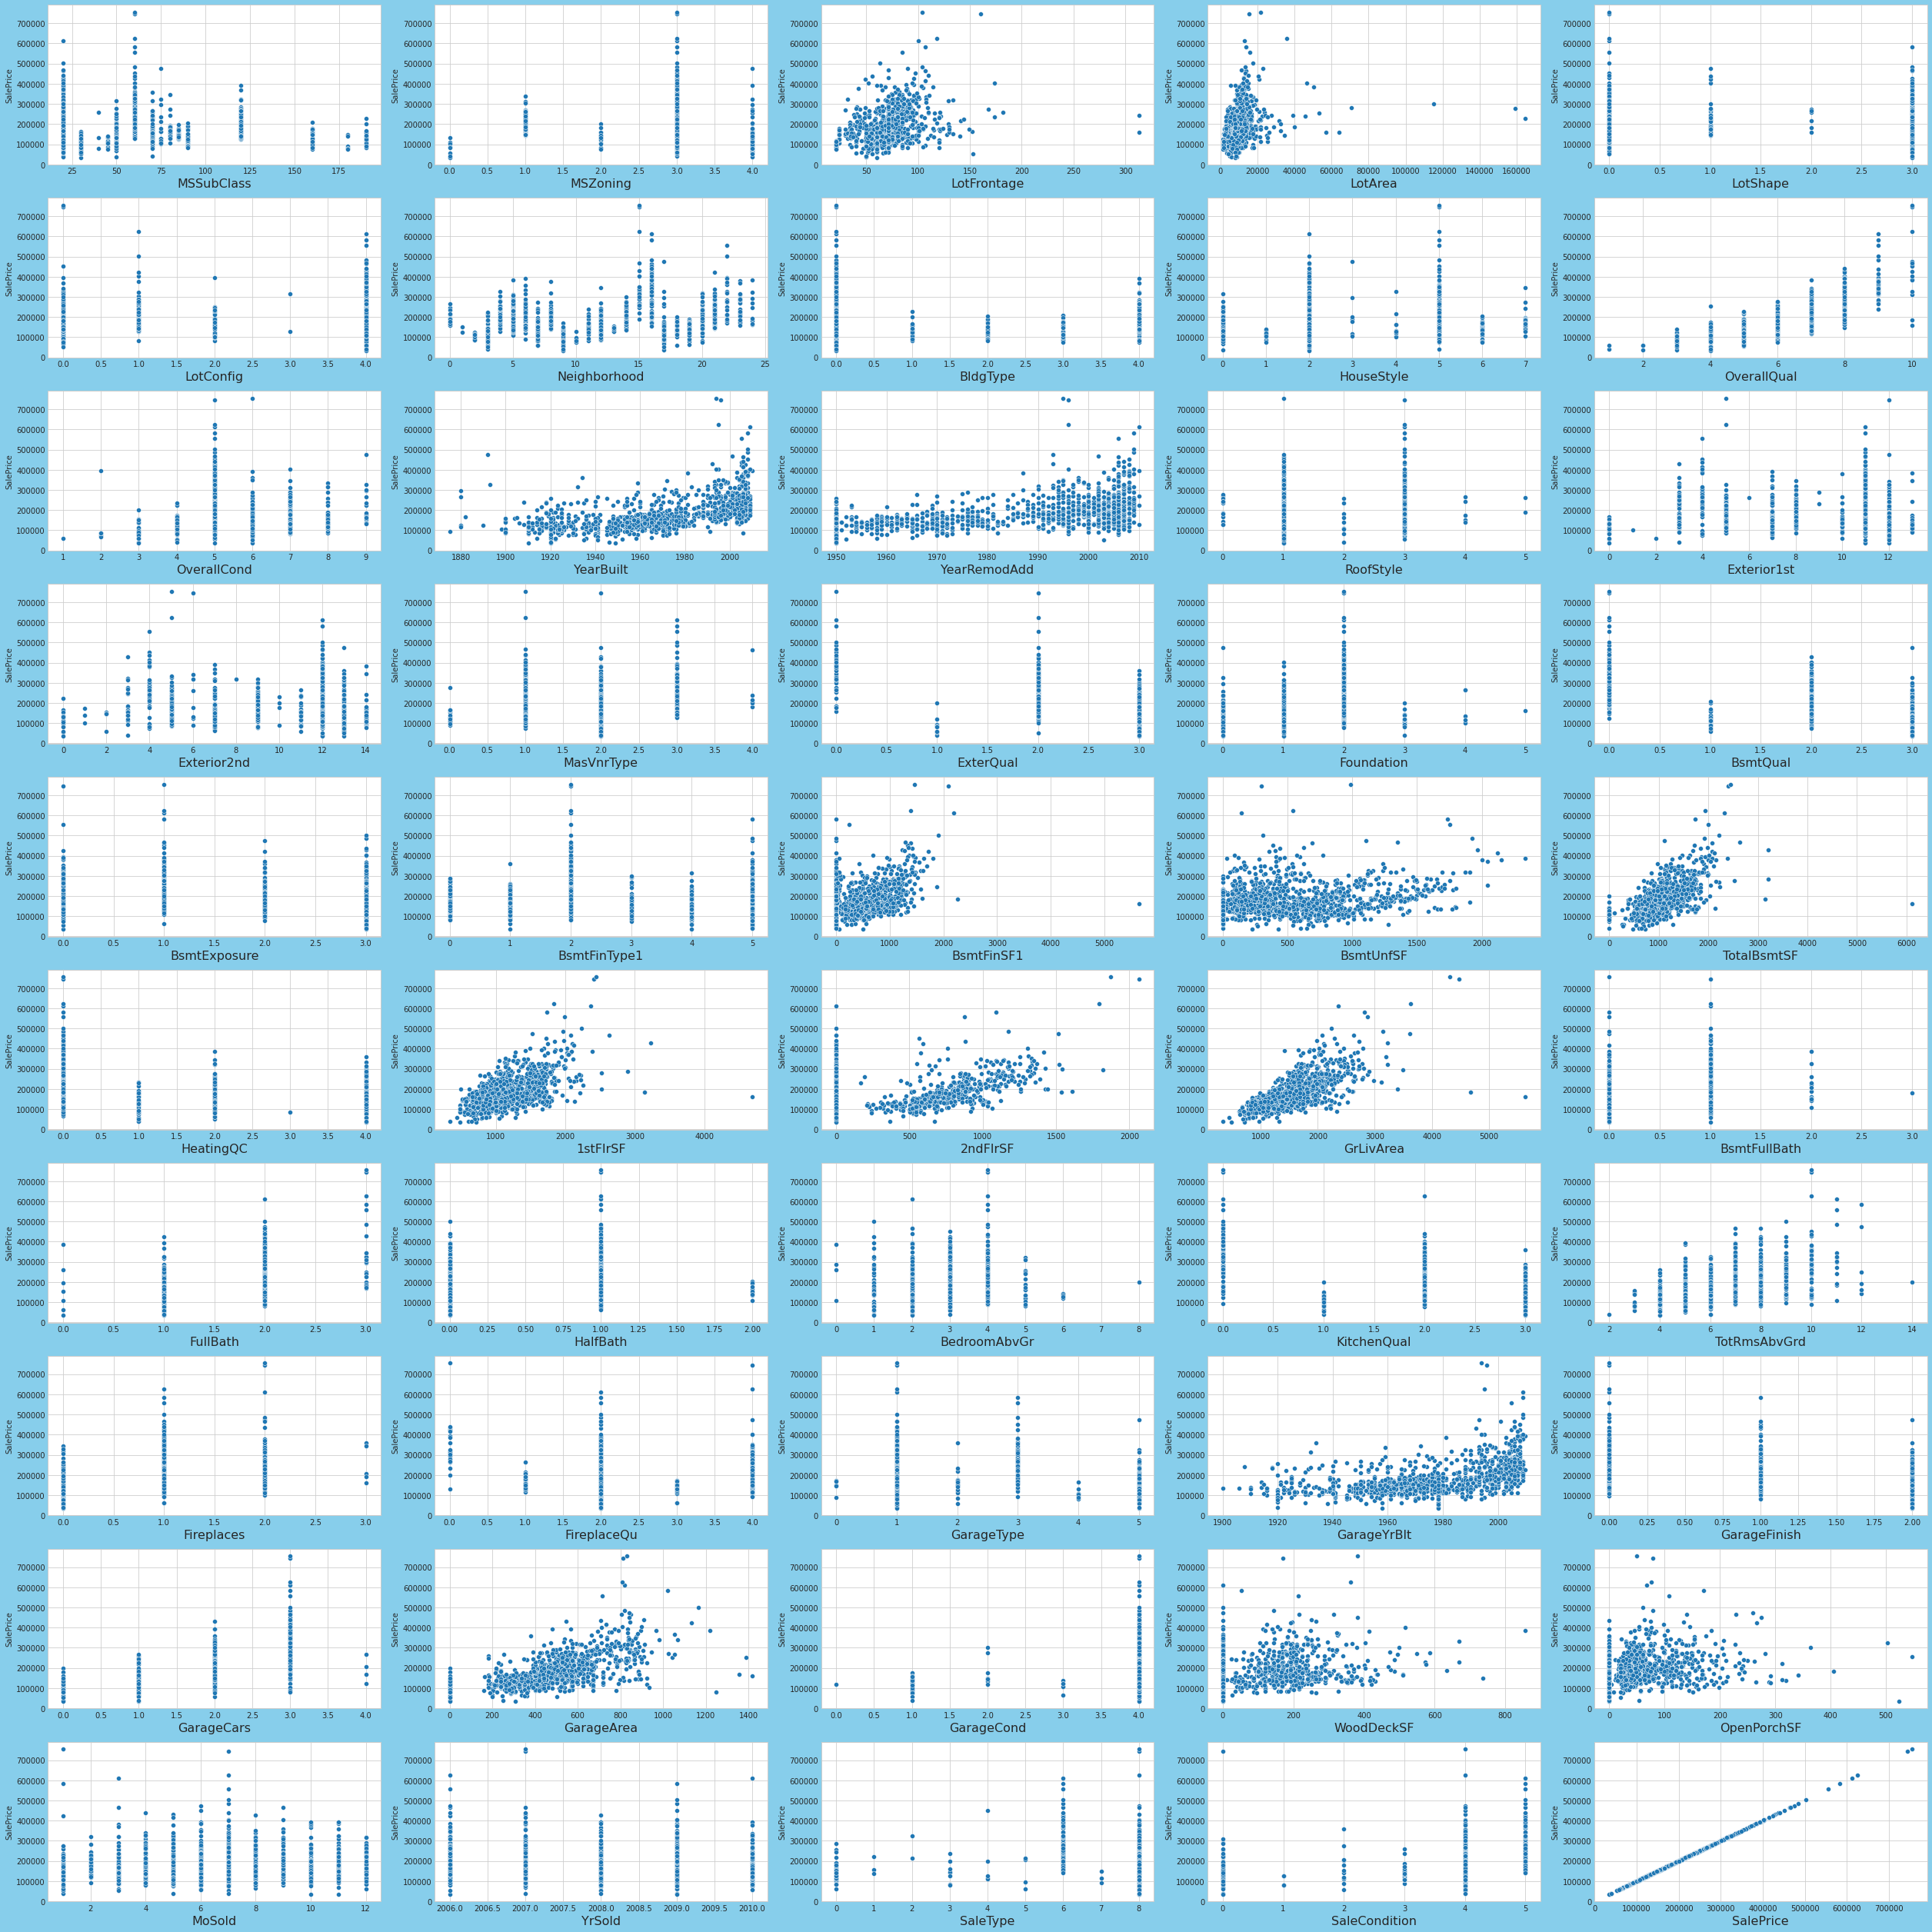

In [230]:
plt.figure(figsize=(35,35),facecolor='skyblue')

plotnumber=1
for column in df:
    if plotnumber <= 50:
        ax=plt.subplot(10,5,plotnumber)
        sns.scatterplot(df[column],y=df.SalePrice)
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


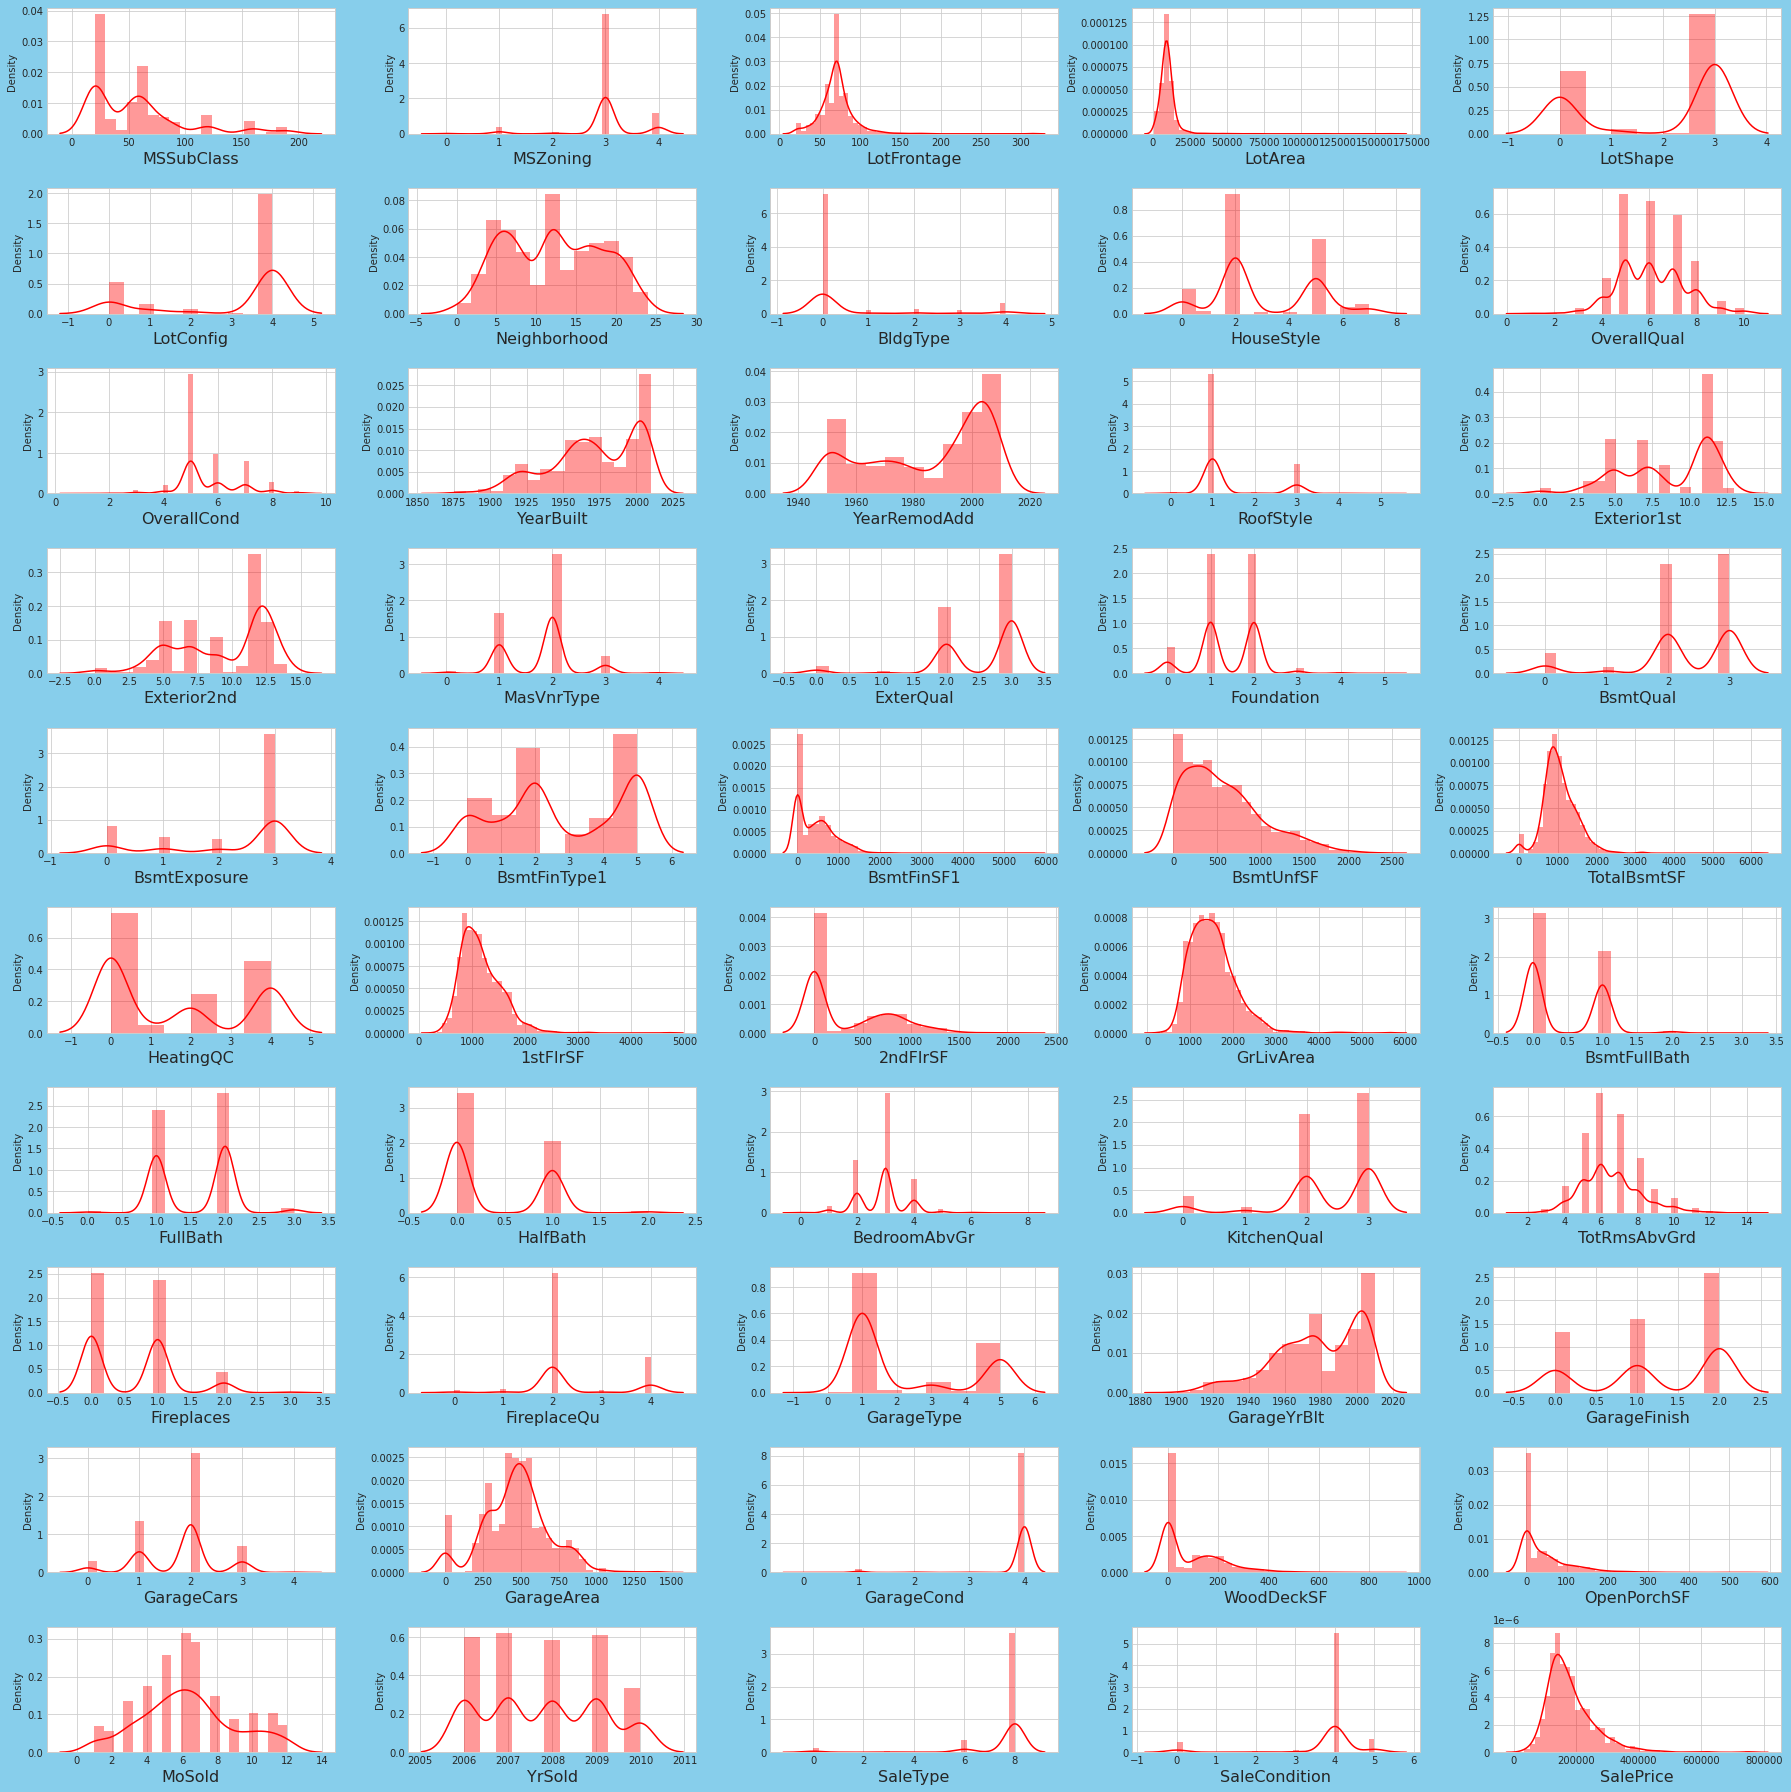

In [231]:
plt.figure(figsize=(25,25),facecolor='skyblue')

plotnumber=1
for column in df:
    if plotnumber <= 50:
        ax=plt.subplot(10,5,plotnumber)
        sns.distplot(df[column],kde=True,color='red')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:- So much skewness in the features.

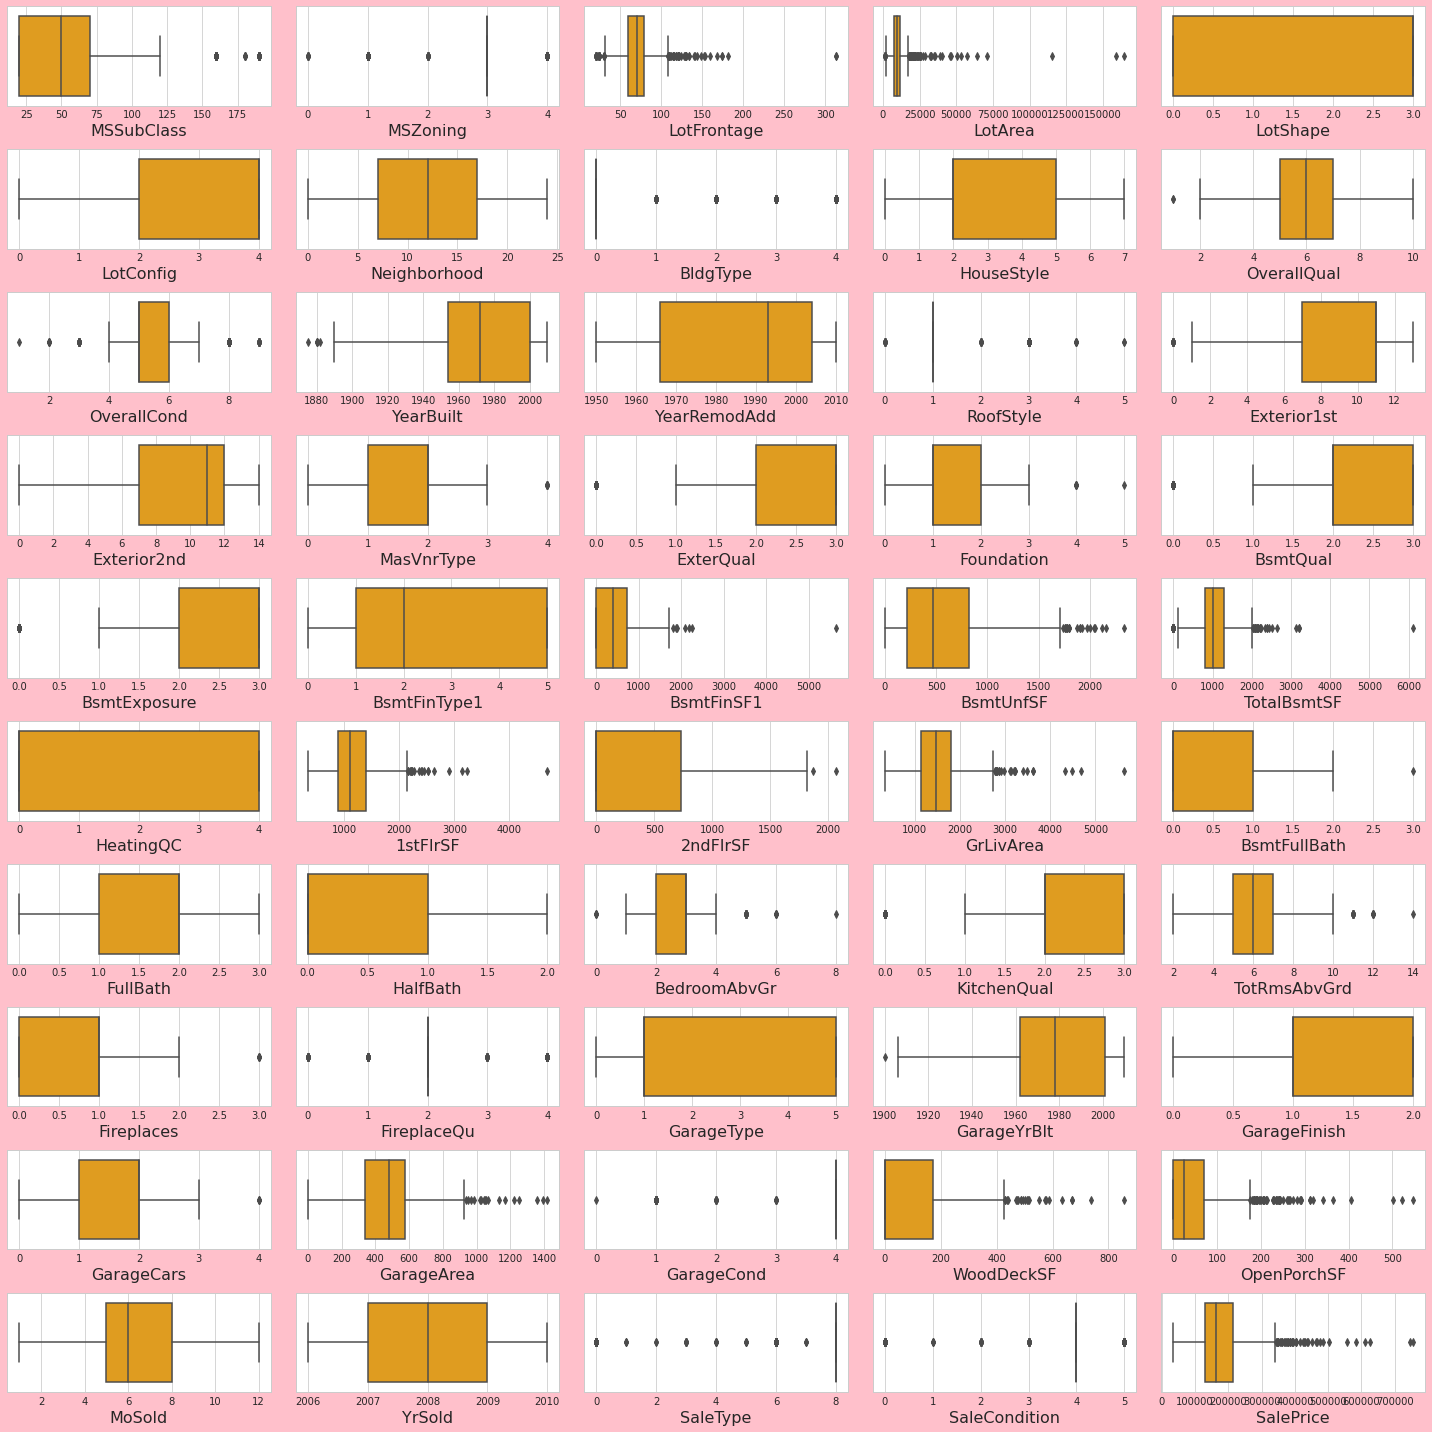

In [232]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 50:
        ax=plt.subplot(10,5,plotnumber)
        sns.boxplot(df[column],color='orange')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:- Clearly outliers are there we have treat them

In [233]:
from scipy.stats import zscore

In [234]:
df.shape

(1168, 50)

In [235]:
df=df[np.abs(zscore(df)<3).all(axis=1)]

In [236]:
df.shape

(1016, 50)

In [237]:
data_loss=1168-1016
print(data_loss)

152


In [238]:
print('loss_percent: ',(152/1168)*100)

loss_percent:  13.013698630136986


### Observation:- 13 percent data removed through zscore

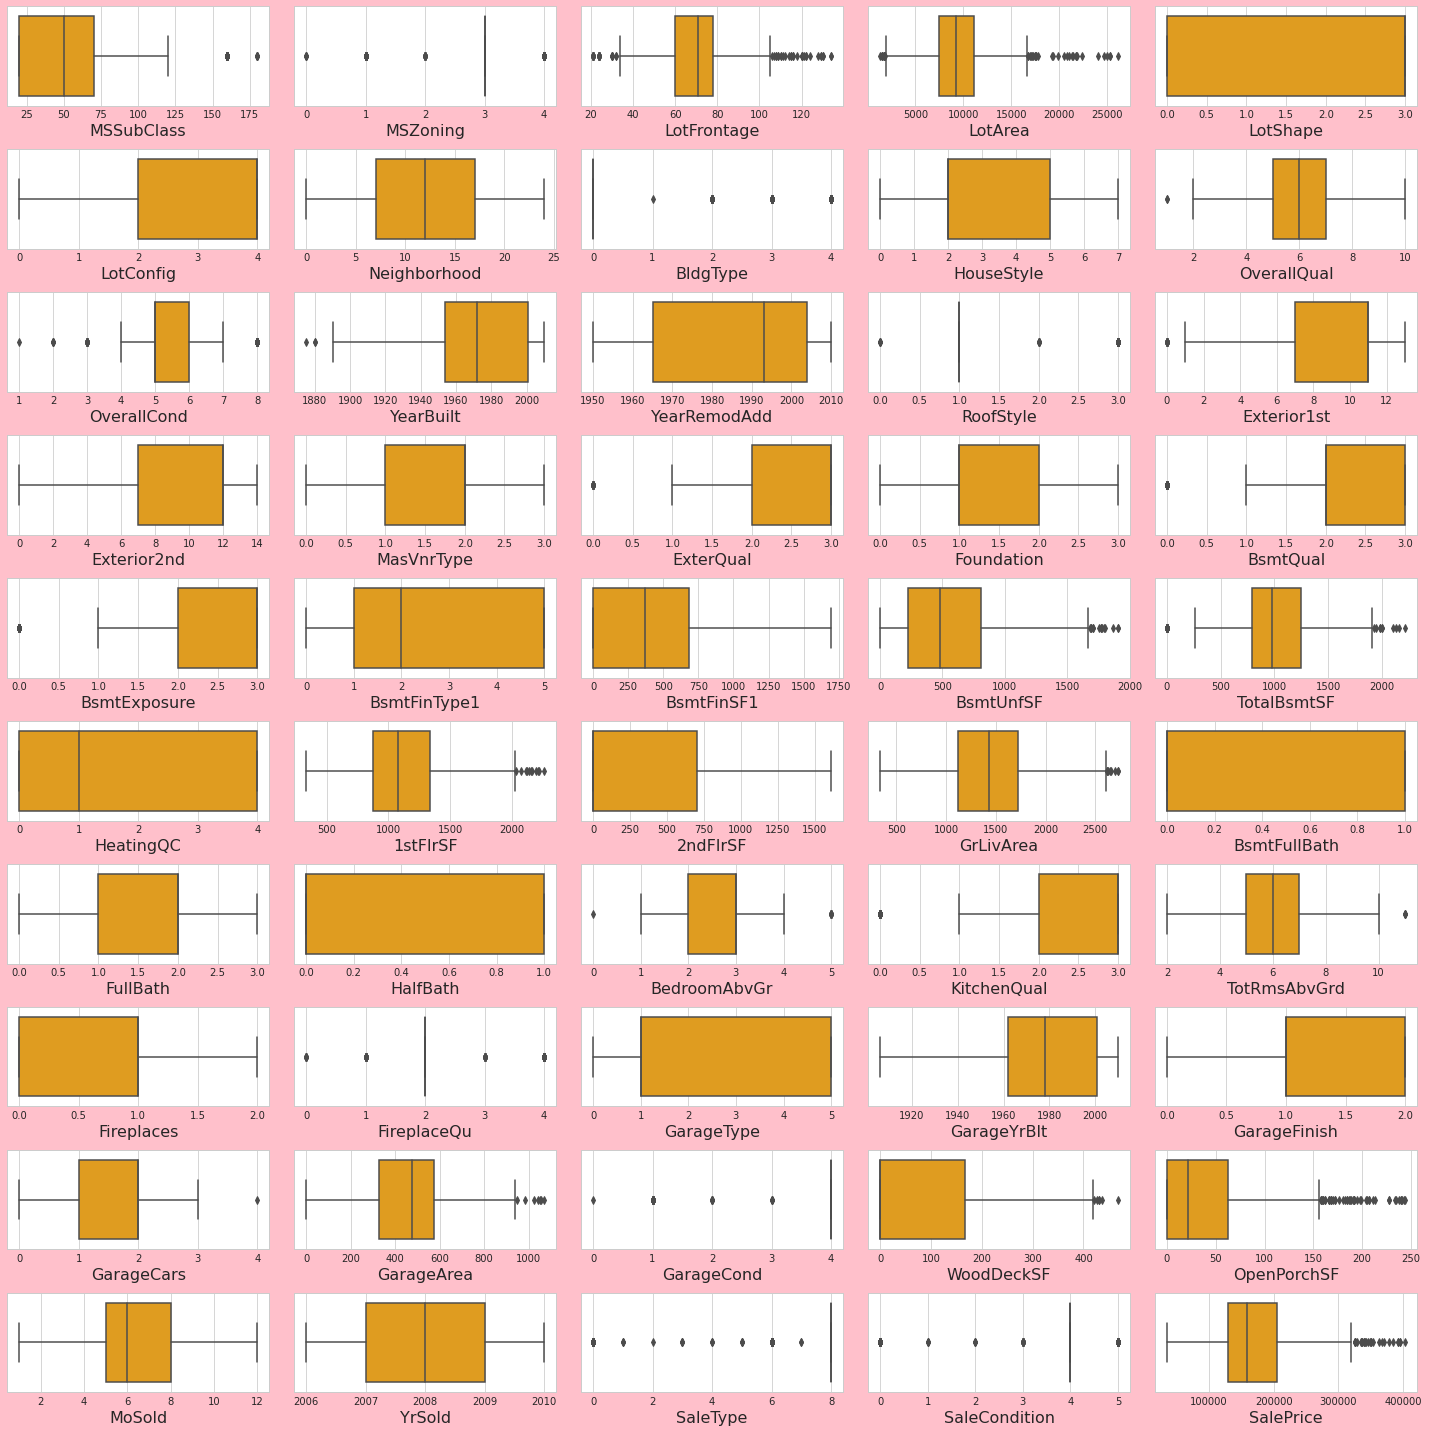

In [239]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 50:
        ax=plt.subplot(10,5,plotnumber)
        sns.boxplot(df[column],color='orange')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


In [240]:
df.skew()

MSSubClass       1.304928
MSZoning        -1.684671
LotFrontage      0.074175
LotArea          0.713011
LotShape        -0.648996
LotConfig       -1.159317
Neighborhood     0.082876
BldgType         2.280655
HouseStyle       0.337542
OverallQual     -0.024822
OverallCond      0.343357
YearBuilt       -0.526118
YearRemodAdd    -0.461606
RoofStyle        1.578694
Exterior1st     -0.620252
Exterior2nd     -0.602589
MasVnrType      -0.091903
ExterQual       -1.711493
Foundation      -0.299177
BsmtQual        -1.375288
BsmtExposure    -1.276533
BsmtFinType1    -0.089583
BsmtFinSF1       0.655147
BsmtUnfSF        0.785518
TotalBsmtSF      0.037274
HeatingQC        0.453652
1stFlrSF         0.632659
2ndFlrSF         0.779448
GrLivArea        0.488055
BsmtFullBath     0.431565
FullBath         0.035625
HalfBath         0.552136
BedroomAbvGr    -0.147857
KitchenQual     -1.445468
TotRmsAbvGrd     0.374726
Fireplaces       0.564720
FireplaceQu      0.966397
GarageType       0.806334
GarageYrBlt 

In [243]:
X=df.drop('SalePrice',axis=1)
y=df.SalePrice

        

In [244]:
for column in X:
    if X[column].skew() > 0.65:
        X[column]=np.sqrt(X[column])
    elif X[column].skew() < -0.65:
        X[column]=np.square(X[column])


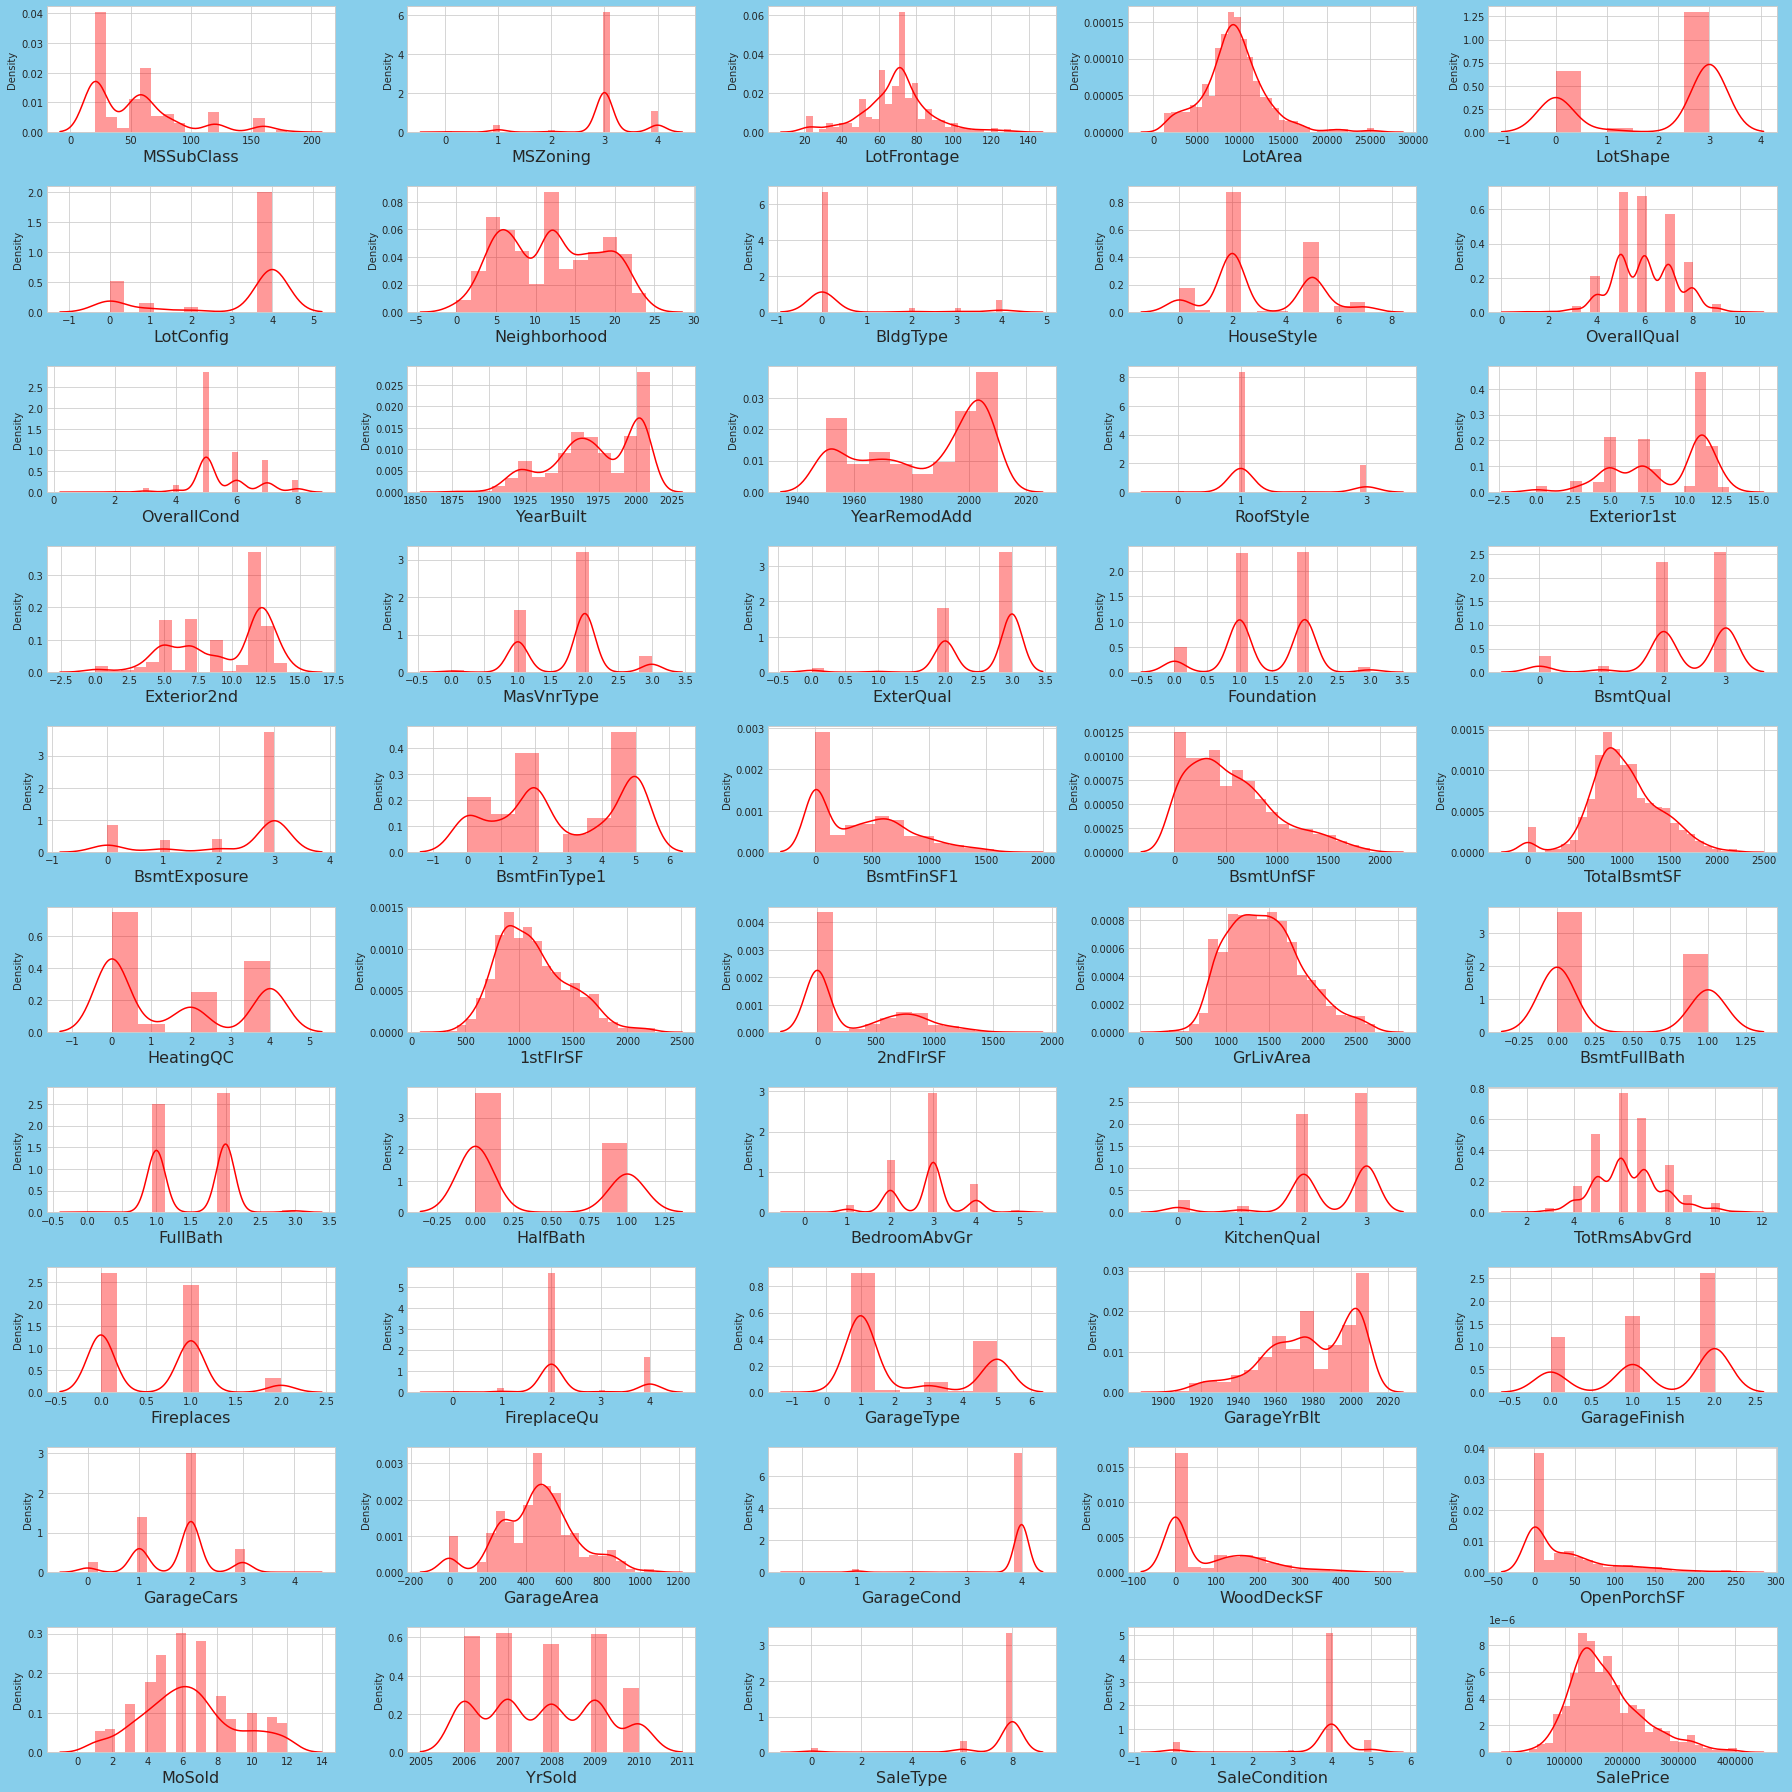

In [245]:
plt.figure(figsize=(25,25),facecolor='skyblue')

plotnumber=1
for column in df:
    if plotnumber <= 50:
        ax=plt.subplot(10,5,plotnumber)
        sns.distplot(df[column],kde=True,color='red')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:- Based on skewness lets drop highly skewed column

In [246]:
X.skew()

MSSubClass       0.697551
MSZoning         0.094541
LotFrontage      0.074175
LotArea         -0.304661
LotShape        -0.648996
LotConfig       -1.051269
Neighborhood     0.082876
BldgType         2.133661
HouseStyle       0.337542
OverallQual     -0.024822
OverallCond      0.343357
YearBuilt       -0.526118
YearRemodAdd    -0.461606
RoofStyle        1.209431
Exterior1st     -0.620252
Exterior2nd     -0.602589
MasVnrType      -0.091903
ExterQual       -0.775599
Foundation      -0.299177
BsmtQual        -0.327167
BsmtExposure    -1.024294
BsmtFinType1    -0.089583
BsmtFinSF1      -0.106522
BsmtUnfSF       -0.324029
TotalBsmtSF      0.037274
HeatingQC        0.453652
1stFlrSF         0.632659
2ndFlrSF         0.474397
GrLivArea        0.488055
BsmtFullBath     0.431565
FullBath         0.035625
HalfBath         0.552136
BedroomAbvGr    -0.147857
KitchenQual     -0.414729
TotRmsAbvGrd     0.374726
Fireplaces       0.564720
FireplaceQu     -0.375600
GarageType       0.700308
GarageYrBlt 

In [247]:
X.drop(columns=['SaleCondition','SaleType','GarageCond','RoofStyle','BsmtExposure','BldgType','LotConfig'],axis=1,inplace=True)

<AxesSubplot:>

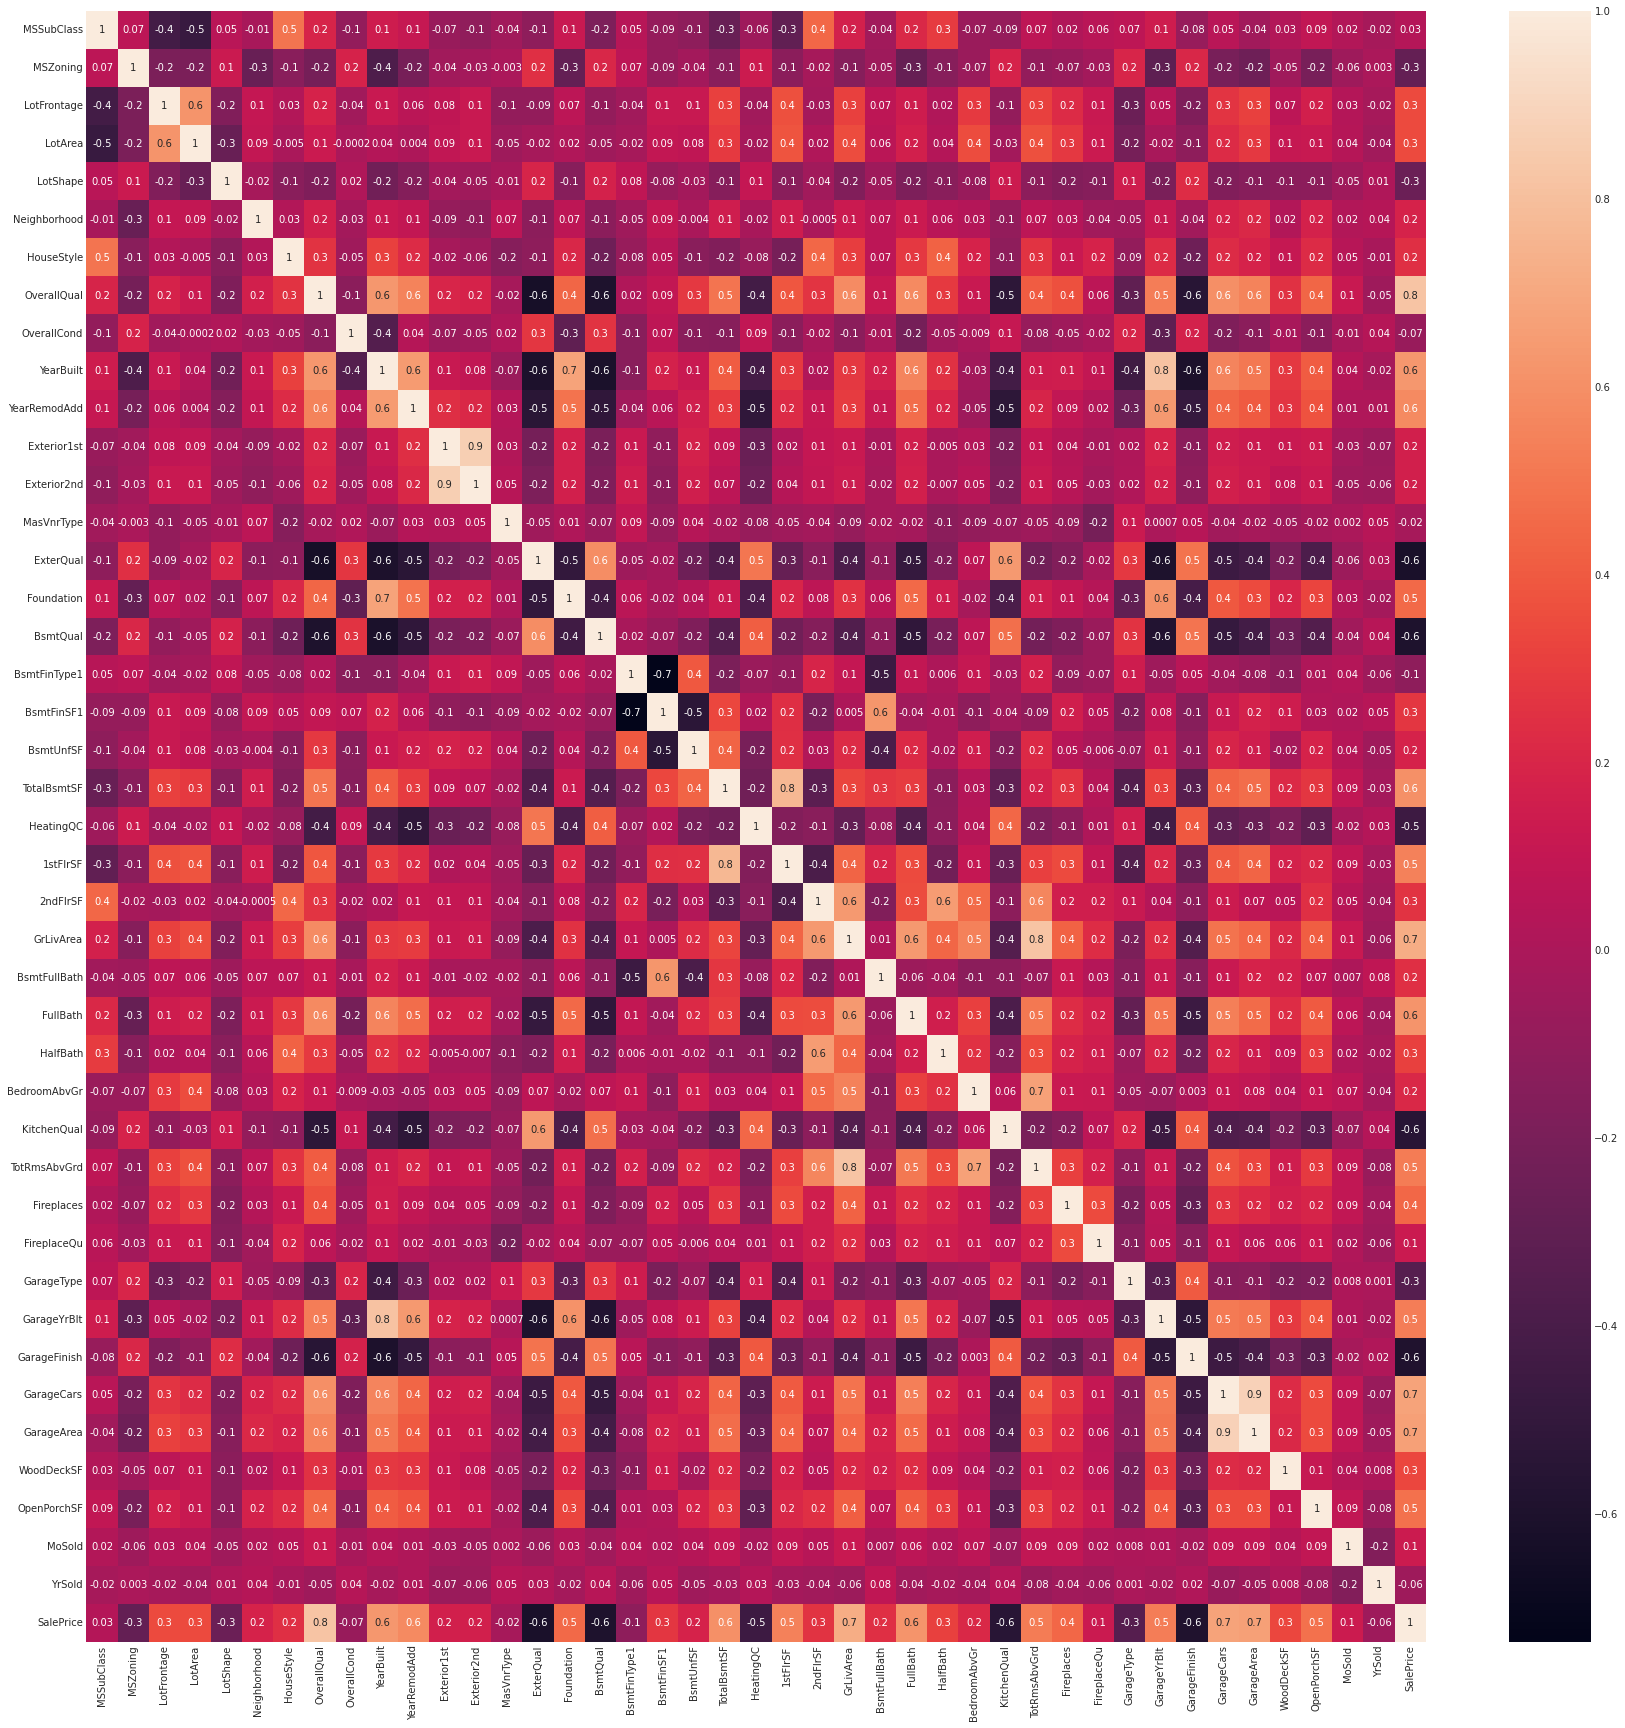

In [113]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10},fmt='.1g')


### Observation:- Some multicolinearity exist in the column we can check through vif

<AxesSubplot:title={'center':'Correlation with Target'}>

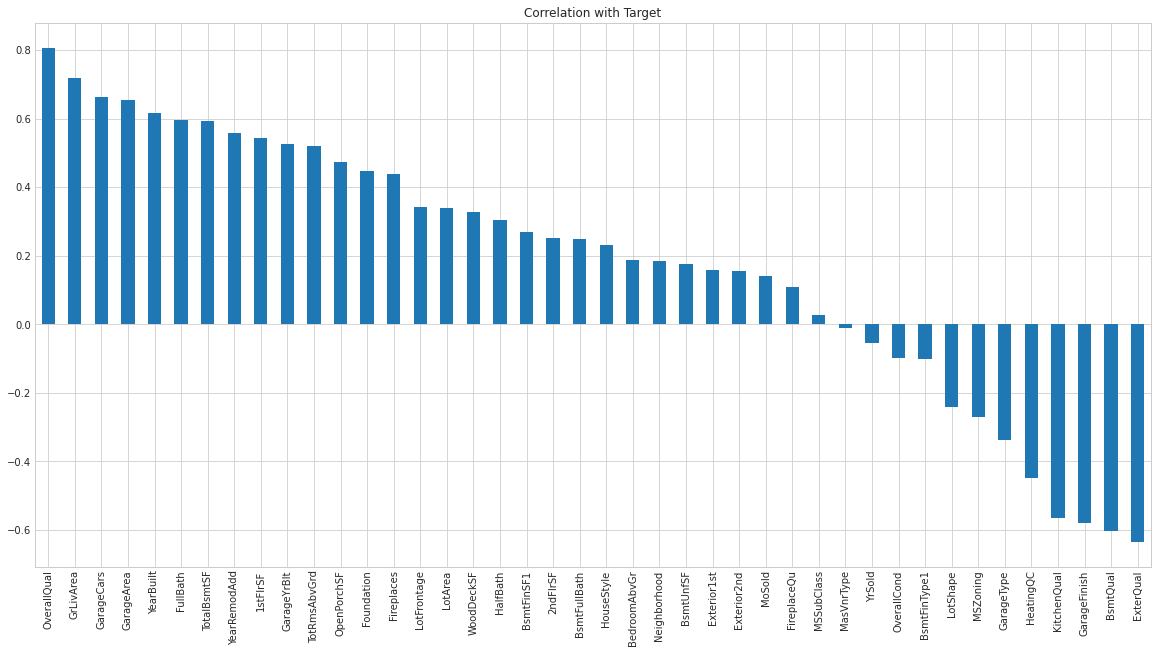

In [249]:
plt.figure(figsize=(20,10))
X.corrwith(y).sort_values(ascending=False).plot(kind='bar',grid=True,title='Correlation with Target')


In [250]:
from sklearn.preprocessing import StandardScaler


In [251]:
scaler=StandardScaler()


In [252]:
x_scaled=scaler.fit_transform(X)


In [253]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif


vif      features
0    2.765024    MSSubClass
1    1.398022      MSZoning
2    1.996152   LotFrontage
3    2.378761       LotArea
4    1.216488      LotShape
5    1.203271  Neighborhood
6    2.199268    HouseStyle
7    3.577079   OverallQual
8    1.624534   OverallCond
9    6.998730     YearBuilt
10   2.818593  YearRemodAdd
11   4.403199   Exterior1st
12   4.442906   Exterior2nd
13   1.160143    MasVnrType
14   2.824671     ExterQual
15   2.379505    Foundation
16   2.264666      BsmtQual
17   2.475115  BsmtFinType1
18   5.395002    BsmtFinSF1
19   4.517478     BsmtUnfSF
20   7.772177   TotalBsmtSF
21   1.667013     HeatingQC
22  22.509465      1stFlrSF
23  29.539239      2ndFlrSF
24  31.703195     GrLivArea
25   1.931627  BsmtFullBath
26   3.263324      FullBath
27   2.519395      HalfBath
28   2.579426  BedroomAbvGr
29   2.036576   KitchenQual
30   4.178901  TotRmsAbvGrd
31   1.623607    Fireplaces
32   1.326169   FireplaceQu
33   1.664389    GarageType
34   3.901144   GarageYrBlt
35   1.983021  GarageFinish
36   5.681863    GarageCars
37   5.515399    GarageArea
38   1.241562    WoodDeckSF
39   1.519175   OpenPorchSF
40   1.078854        MoSold
41   1.067028        YrSold

In [254]:
## Dropping columns with high multicolinearity.
X.drop('2ndFlrSF',axis=1,inplace=True)

In [255]:
x_scaled=scaler.fit_transform(X)


In [256]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif

vif      features
0   2.655419    MSSubClass
1   1.397448      MSZoning
2   1.988893   LotFrontage
3   2.371783       LotArea
4   1.215121      LotShape
5   1.198537  Neighborhood
6   2.107480    HouseStyle
7   3.523760   OverallQual
8   1.622840   OverallCond
9   6.988384     YearBuilt
10  2.798571  YearRemodAdd
11  4.400960   Exterior1st
12  4.441808   Exterior2nd
13  1.156950    MasVnrType
14  2.810905     ExterQual
15  2.379080    Foundation
16  2.264354      BsmtQual
17  2.474782  BsmtFinType1
18  5.379434    BsmtFinSF1
19  4.501699     BsmtUnfSF
20  7.720599   TotalBsmtSF
21  1.666674     HeatingQC
22  4.956871      1stFlrSF
23  7.698897     GrLivArea
24  1.931073  BsmtFullBath
25  3.223112      FullBath
26  2.435084      HalfBath
27  2.571383  BedroomAbvGr
28  2.036059   KitchenQual
29  4.173984  TotRmsAbvGrd
30  1.622132    Fireplaces
31  1.321229   FireplaceQu
32  1.661108    GarageType
33  3.833285   GarageYrBlt
34  1.978665  GarageFinish
35  5.680460    GarageCars
36  5.511197    GarageArea
37  1.241480    WoodDeckSF
38  1.513758   OpenPorchSF
39  1.078315        MoSold
40  1.066631        YrSold

## Observation:- Since it is less than 10 we can proceed for model building

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [258]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=332)


In [259]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print('Traning r2_score: ',r2_score(y_train,ypred)*100)
    elif train==False:
        y_pred=clf.predict(x_test)
        print('The testing Score-',r2_score(y_test,y_pred)*100)
        print('MSE: ',mean_squared_error(y_test,y_pred))
        print('MAE: ',mean_absolute_error(y_test,y_pred))
        print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pred)))


### Linear Regression

In [260]:
lr= LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [261]:
model(lr,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  89.24949039291864


In [262]:
model(lr,x_train,x_test,y_train,y_test,train=False)

The testing Score- 88.06959058654714
MSE:  508413313.61862427
MAE:  16694.97049268373
RMSE  22548.022388196805


In [263]:
from sklearn.model_selection import cross_val_score

In [264]:
print('cross_val_score:',cross_val_score(lr,x_scaled,y,cv=5).mean())

cross_val_score: 0.8790573896273985


## Regularization

In [265]:
## Ridge
ridgecv=RidgeCV(alphas=(0.1,0.001,0.1,1,2),cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.e-01, 1.e-03, 1.e-01, 1.e+00, 2.e+00]), cv=10,
        normalize=True)

In [266]:
ridgecv.alpha_

0.1

In [267]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [268]:
model(ridge,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  89.24948821148288


In [269]:
model(ridge,x_train,x_test,y_train,y_test,train=False)

The testing Score- 88.06979241411689
MSE:  508404712.7550694
MAE:  16694.961307776848
RMSE  22547.831664154968


In [272]:
## Lasso
lassocv=LassoCV(cv=10,max_iter=10000,normalize=True)
lassocv.fit(x_train,y_train)


LassoCV(cv=10, max_iter=10000, normalize=True)

In [273]:
lassocv.alpha_

8.42679615975722

In [274]:
lasso=Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=8.42679615975722)

In [275]:
model(lasso,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  89.24934485206172


In [276]:
model(lasso,x_train,x_test,y_train,y_test,train=False)

The testing Score- 88.07788720345569
MSE:  508059754.0425764
MAE:  16689.681884800295
RMSE  22540.18087865704


## RandomForest

In [277]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [278]:
model(rf,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  98.1787942771657


In [279]:
model(rf,x_train,x_test,y_train,y_test,train=False)

The testing Score- 88.05265025317716
MSE:  509135224.38664246
MAE:  15603.47181102362
RMSE  22564.02500412199


In [280]:
print('cross_val_score:',cross_val_score(rf,x_scaled,y,cv=5).mean())

cross_val_score: 0.8798478287502096


In [281]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [282]:
model(xgb,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  99.99811203212043


In [283]:
model(xgb,x_train,x_test,y_train,y_test,train=False)

The testing Score- 87.5325511360909
MSE:  531299201.0251783
MAE:  16653.744402066928
RMSE  23049.928438612955


In [284]:
print('cross_val_score:',cross_val_score(xgb,x_scaled,y,cv=5).mean())

cross_val_score: 0.8741023918484228


## GradientBoostingRegressor

In [285]:
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [286]:
model(gbdt,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  97.19555917529463


In [287]:
model(gbdt,x_train,x_test,y_train,y_test,train=False)

The testing Score- 88.8496620327053
MSE:  475170639.78772146
MAE:  15130.19232599877
RMSE  21798.40911139438


In [288]:
print('cross_val_score:',cross_val_score(gbdt,x_scaled,y,cv=5).mean())

cross_val_score: 0.8980558034196973


## KNN

In [290]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [291]:
model(knn,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  89.46456196221796


In [292]:
model(knn,x_train,x_test,y_train,y_test,train=False)

The testing Score- 84.45418079146208
MSE:  662483673.6798425
MAE:  18874.885826771653
RMSE  25738.758200034485


# Conclusion:- Lasso Regression is best performing model with equal r2_score and cross_val_score.Also this model is not overfitting

In [293]:
## Hyperparameter Tuning of GradientBoosting Regressor
from sklearn.model_selection import GridSearchCV

In [294]:
params={'learning_rate':[0.1,0.01,0.001,1,0.2],
       'min_samples_leaf':[3,4,5,7,9,11],
       'max_depth':[3,5,7,9,11,13],
       'min_samples_split':[3,5,7,9],
       'n_estimators':[100]}

In [295]:
gs=GridSearchCV(gbdt,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1, 0.2],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'min_samples_leaf': [3, 4, 5, 7, 9, 11],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [100]})

In [296]:
gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'n_estimators': 100}

In [298]:
gbdt=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,min_samples_leaf=7,min_samples_split=5,n_estimators=100)
gbdt.fit(x_train,y_train)

GradientBoostingRegressor(min_samples_leaf=7, min_samples_split=5)

In [299]:
model(gbdt,x_train,x_test,y_train,y_test,train=True)

Traning r2_score:  97.02645409508477


In [300]:
model(gbdt,x_train,x_test,y_train,y_test,train=False)

The testing Score- 88.63942113711587
MSE:  484130036.458907
MAE:  14829.001769717765
RMSE  22002.95517558737


In [301]:
print('cross_val_score:',cross_val_score(gbdt,x_scaled,y,cv=5).mean())

cross_val_score: 0.8985045696297831


## Final Conclusion:- Since cannot able to reduce overfitting so saving lasso as final model

In [302]:
model(lasso,x_train,x_test,y_train,y_test,train=False)

The testing Score- 88.07788720345569
MSE:  508059754.0425764
MAE:  16689.681884800295
RMSE  22540.18087865704


In [303]:

y_pred=lasso.predict(x_test)

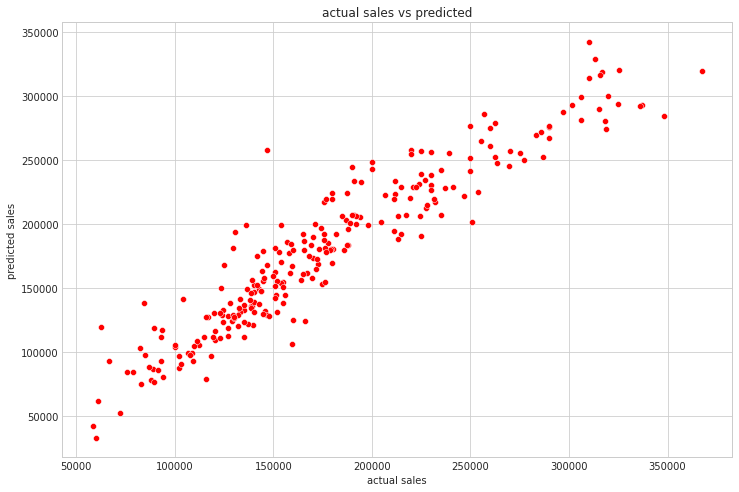

In [304]:
plt.figure(figsize=(12,8))
sns.scatterplot(y_test,y_pred,color='red')
plt.xlabel("actual sales")
plt.ylabel("predicted sales")
plt.title("actual sales vs predicted")
plt.show()


In [305]:
pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pred


Actual      Predicted
248   224500  206560.133615
1099  100000  103983.824673
1001  158000  177532.999859
1152  136500  149285.248505
1055  146000  132112.867385
...      ...            ...
1098  165000  161122.499323
869   217500  207688.621954
398   144900  130337.986549
419   127000  113046.549090
107   135000  112149.040461

[254 rows x 2 columns]

In [335]:
##SAVING the model
import pickle
filename='Housing_price_prediction'
pickle.dump(lasso,open(filename,'wb'))


In [307]:
## Test data
df2=pd.read_csv('test (1).csv')

In [308]:
df2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [309]:
df2.drop(columns=['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','MasVnrArea',
                'ExterCond','ExterCond','BsmtCond','BsmtFinType2','BsmtFinSF2','Heating','CentralAir','Electrical',
                'LowQualFinSF','KitchenAbvGr','BsmtHalfBath','Functional','GarageQual','PavedDrive','EnclosedPorch',
                '3SsnPorch','ScreenPorch','PoolArea','MiscVal','Alley','Id','PoolQC','Fence','MiscFeature',
                 'SaleCondition','SaleType','GarageCond','RoofStyle','BsmtExposure','BldgType','LotConfig',
                 '2ndFlrSF'],axis=1,inplace=True)

In [310]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    292 non-null    int64  
 1   MSZoning      292 non-null    object 
 2   LotFrontage   247 non-null    float64
 3   LotArea       292 non-null    int64  
 4   LotShape      292 non-null    object 
 5   Neighborhood  292 non-null    object 
 6   HouseStyle    292 non-null    object 
 7   OverallQual   292 non-null    int64  
 8   OverallCond   292 non-null    int64  
 9   YearBuilt     292 non-null    int64  
 10  YearRemodAdd  292 non-null    int64  
 11  Exterior1st   292 non-null    object 
 12  Exterior2nd   292 non-null    object 
 13  MasVnrType    291 non-null    object 
 14  ExterQual     292 non-null    object 
 15  Foundation    292 non-null    object 
 16  BsmtQual      285 non-null    object 
 17  BsmtFinType1  285 non-null    object 
 18  BsmtFinSF1    292 non-null    

In [311]:
df2.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
LotShape          0
Neighborhood      0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
Exterior1st       0
Exterior2nd       0
MasVnrType        1
ExterQual         0
Foundation        0
BsmtQual          7
BsmtFinType1      7
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
1stFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
FireplaceQu     139
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0
YrSold            0
dtype: int64

In [314]:
df2['LotFrontage']=df2['LotFrontage'].fillna(df2['LotFrontage'].mean())
df2['BsmtQual']=df2['BsmtQual'].fillna(df2['BsmtQual'].mode()[0])
df2['FireplaceQu']=df2['FireplaceQu'].fillna(df2['FireplaceQu'].mode()[0])
df2['BsmtFinType1']=df2['BsmtFinType1'].fillna(df2['BsmtFinType1'].mode()[0])
df2['GarageType']=df2['GarageType'].fillna(df2['GarageType'].mode()[0])
df2['GarageYrBlt']=df2['GarageYrBlt'].fillna(df2['GarageYrBlt'].mean())
df2['GarageFinish']=df2['GarageFinish'].fillna(df2['GarageFinish'].mode()[0])
df2['MasVnrType']=df2['MasVnrType'].fillna(df2['MasVnrType'].mode()[0])

In [315]:
df2.isna().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
LotShape        0
Neighborhood    0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
dtype: int64

In [316]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1167
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1016 non-null   float64
 1   MSZoning      1016 non-null   int64  
 2   LotFrontage   1016 non-null   float64
 3   LotArea       1016 non-null   float64
 4   LotShape      1016 non-null   int64  
 5   Neighborhood  1016 non-null   int64  
 6   HouseStyle    1016 non-null   int64  
 7   OverallQual   1016 non-null   int64  
 8   OverallCond   1016 non-null   int64  
 9   YearBuilt     1016 non-null   int64  
 10  YearRemodAdd  1016 non-null   int64  
 11  Exterior1st   1016 non-null   int64  
 12  Exterior2nd   1016 non-null   int64  
 13  MasVnrType    1016 non-null   int64  
 14  ExterQual     1016 non-null   int64  
 15  Foundation    1016 non-null   int64  
 16  BsmtQual      1016 non-null   int64  
 17  BsmtFinType1  1016 non-null   int64  
 18  BsmtFinSF1    1016 non-null 

In [317]:
cat=[]
for col in df2:
    if df2[col].dtypes=='object':
        cat.append(col)

In [318]:
cat

['MSZoning',
 'LotShape',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [319]:
df2[cat]=df2[cat].apply(le.fit_transform)

In [320]:
df2

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  Neighborhood  \
0            20         2    86.000000    14157         0            21   
1           120         2    66.425101     5814         0            21   
2            20         2    66.425101    11838         3             4   
3            70         2    75.000000    12000         3             5   
4            60         2    86.000000    14598         0            20   
..          ...       ...          ...      ...       ...           ...   
287          20         2    78.000000    10206         3            20   
288          20         2    57.000000     9245         1             4   
289          20         2    66.425101    11241         0            11   
290          50         3    50.000000     5000         3             2   
291         160         3    21.000000     1953         3             1   

     HouseStyle  OverallQual  OverallCond  YearBuilt  ...  FireplaceQu  \
0             2            9            5       2005  ...            2   
1             2            8            5       1984  ...            0   
2             2            8            5       2001  ...            4   
3             5            7            7       1941  ...            2   
4             5            6            5       2007  ...            2   
..          ...          ...          ...        ...  ...          ...   
287           2            8            5       2007  ...            2   
288           2            5            5       1994  ...            2   
289           2            6            7       1970  ...            4   
290           0            6            7       1947  ...            2   
291           5            6            5       1973  ...            2   

     GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
0             1       2005.0             0           3         676   
1             1       1984.0             1           2         565   
2             1       2001.0             1           2         522   
3             1       1941.0             2           1         234   
4             3       2007.0             0           3         668   
..          ...          ...           ...         ...         ...   
287           1       2007.0             1           3         758   
288           5       1996.0             2           2         672   
289           1       1970.0             0           2         480   
290           5       1950.0             2           2         420   
291           5       1973.0             2           1         264   

     WoodDeckSF  OpenPorchSF  MoSold  YrSold  
0           178           51       7    2007  
1            63            0       8    2009  
2           202          151       6    2009  
3             0            0       7    2009  
4           100           18       1    2008  
..          ...          ...     ...     ...  
287         144           99      10    2008  
288           0            0       2    2008  
289           0            0       3    2010  
290           0           24      10    2006  
291          72            0       6    2006  

[292 rows x 41 columns]

In [321]:
df2.shape

(292, 41)

In [323]:
df2=df2[np.abs(zscore(df2)<3).all(axis=1)]

In [324]:
df2.shape

(253, 41)

In [325]:
data_loss=292-253

In [326]:
data_loss

39

In [327]:
df2.skew()

MSSubClass      1.375123
MSZoning        0.099860
LotFrontage    -0.084608
LotArea         1.802646
LotShape       -0.656631
Neighborhood    0.070504
HouseStyle      0.409396
OverallQual     0.333173
OverallCond     0.934544
YearBuilt      -0.788216
YearRemodAdd   -0.539911
Exterior1st    -0.629797
Exterior2nd    -0.653766
MasVnrType      0.028938
ExterQual      -1.858030
Foundation     -0.530634
BsmtQual       -1.318670
BsmtFinType1   -0.010663
BsmtFinSF1      0.770042
BsmtUnfSF       0.879972
TotalBsmtSF     0.139464
HeatingQC       0.436450
1stFlrSF        0.671635
GrLivArea       0.702698
BsmtFullBath    0.397186
FullBath        0.007472
HalfBath        0.661303
BedroomAbvGr   -0.396619
KitchenQual    -1.484001
TotRmsAbvGrd    0.334727
Fireplaces      0.456886
FireplaceQu     0.937477
GarageType      0.890905
GarageYrBlt    -0.714261
GarageFinish   -0.436477
GarageCars     -0.298652
GarageArea      0.181872
WoodDeckSF      1.206806
OpenPorchSF     1.627182
MoSold          0.181914


In [328]:
for column in df2:
    if df2[column].skew() > 0.65:
        df2[column]=np.sqrt(df2[column])
    elif df2[column].skew() < -0.65:
        df2[column]=np.square(df2[column])


In [329]:
df2.skew()

MSSubClass      0.803441
MSZoning        0.099860
LotFrontage    -0.084608
LotArea         0.131546
LotShape       -0.614096
Neighborhood    0.070504
HouseStyle      0.409396
OverallQual     0.333173
OverallCond     0.651469
YearBuilt      -0.759753
YearRemodAdd   -0.539911
Exterior1st    -0.629797
Exterior2nd    -0.287705
MasVnrType      0.028938
ExterQual      -0.843280
Foundation     -0.530634
BsmtQual       -0.330401
BsmtFinType1   -0.010663
BsmtFinSF1     -0.068843
BsmtUnfSF      -0.336825
TotalBsmtSF     0.139464
HeatingQC       0.436450
1stFlrSF        0.376859
GrLivArea       0.232119
BsmtFullBath    0.397186
FullBath        0.007472
HalfBath        0.661303
BedroomAbvGr   -0.396619
KitchenQual    -0.503281
TotRmsAbvGrd    0.334727
Fireplaces      0.456886
FireplaceQu    -0.353335
GarageType      0.838451
GarageYrBlt    -0.692597
GarageFinish   -0.436477
GarageCars     -0.298652
GarageArea      0.181872
WoodDeckSF      0.491325
OpenPorchSF     0.387444
MoSold          0.181914


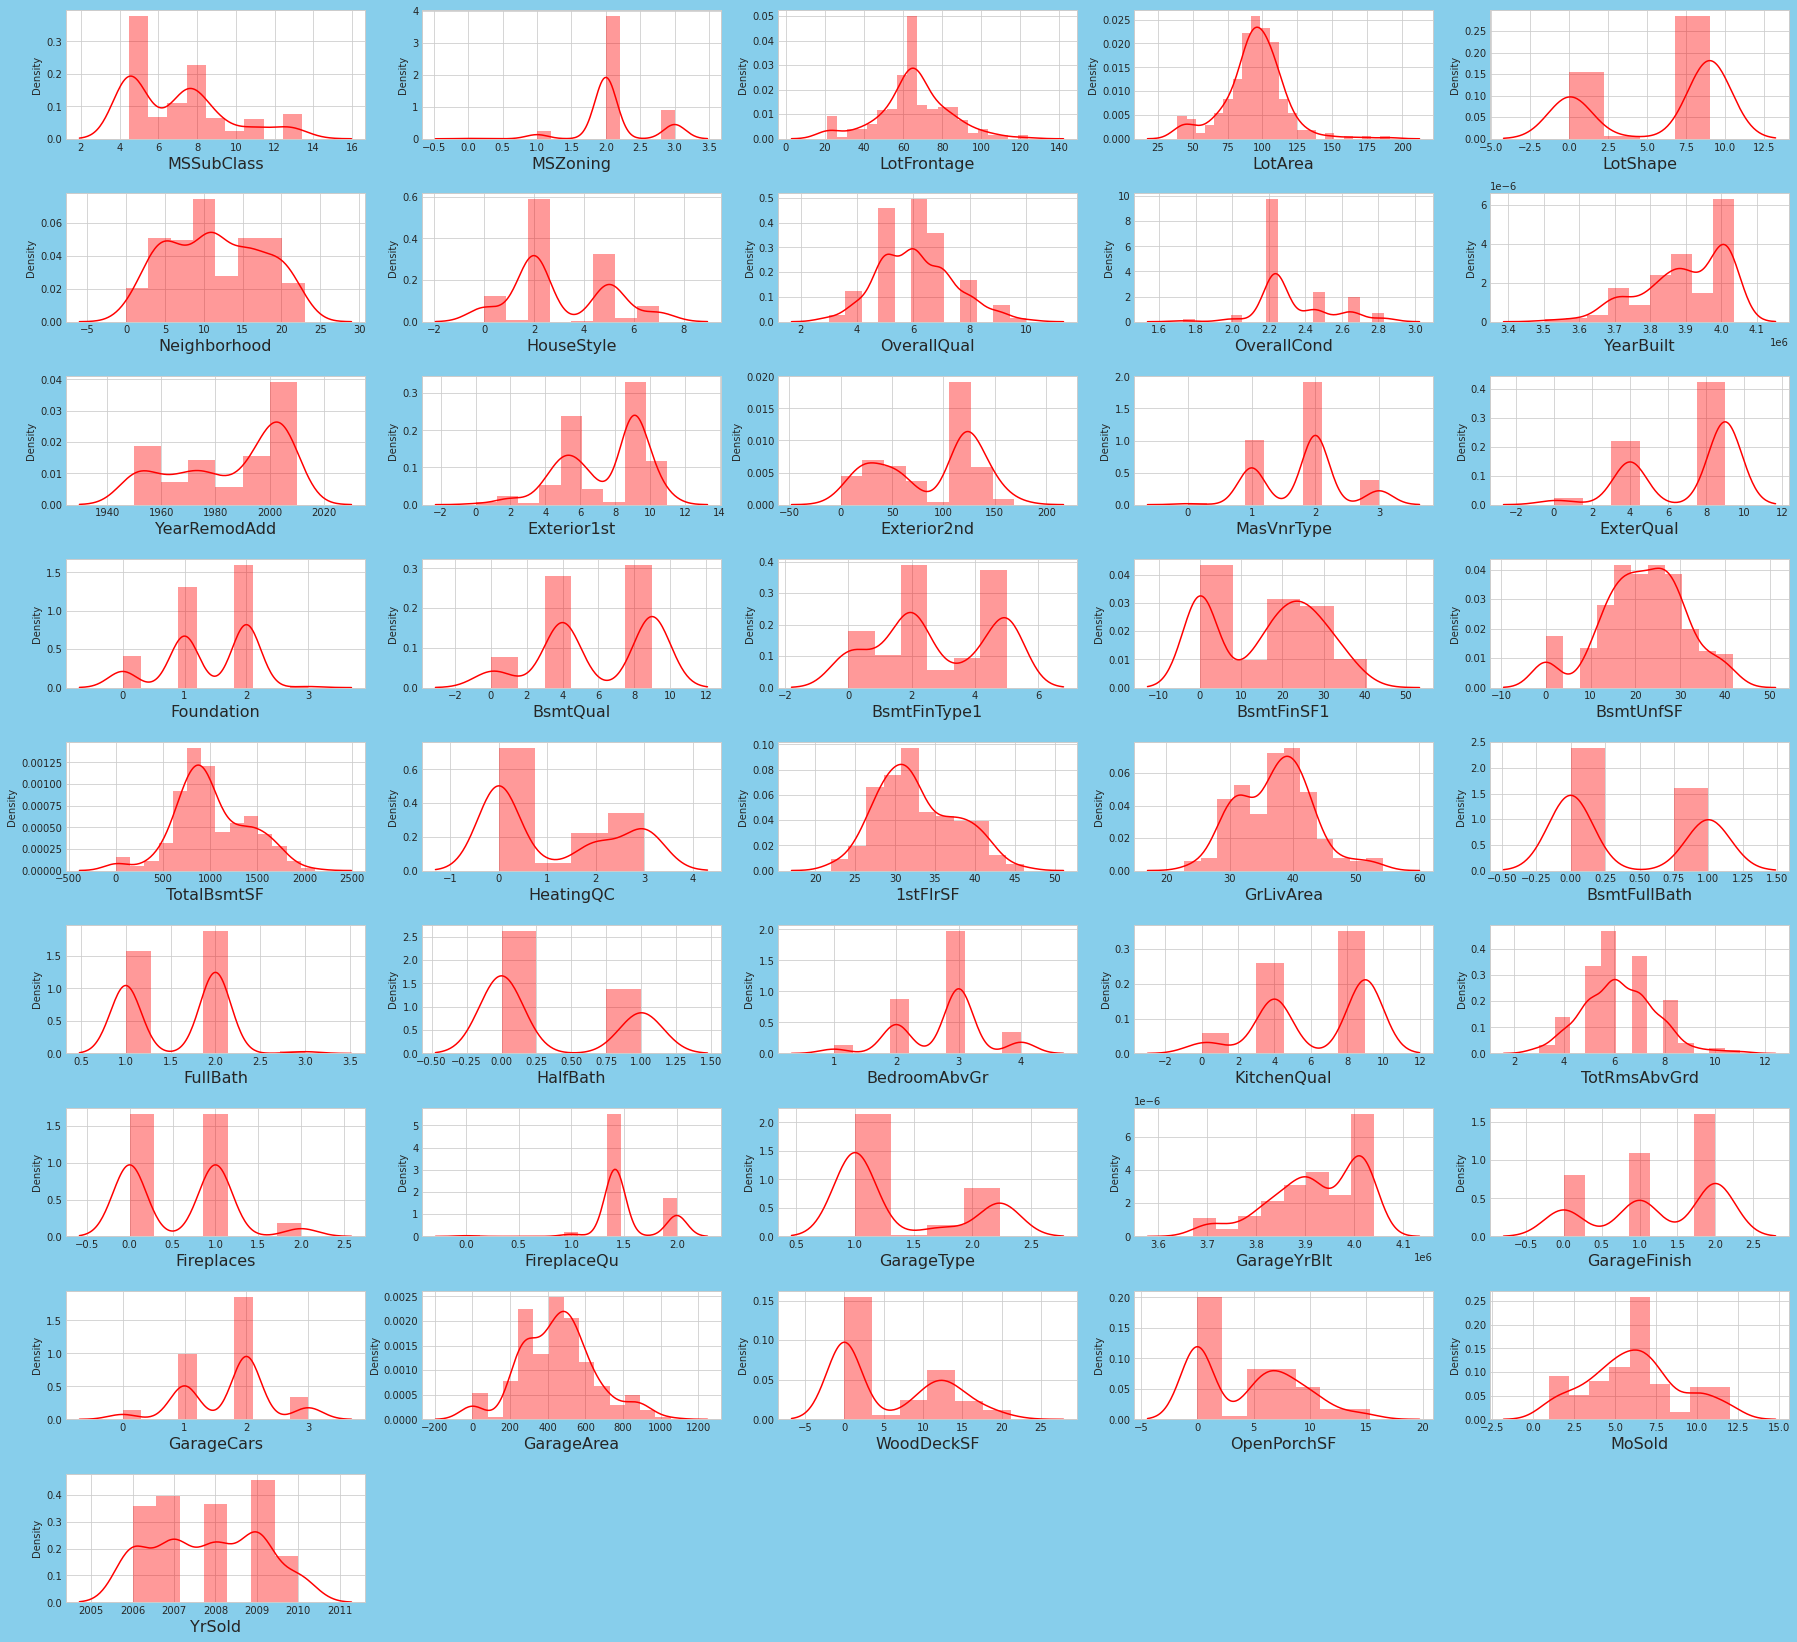

In [330]:
plt.figure(figsize=(25,25),facecolor='skyblue')

plotnumber=1
for column in df2:
    if plotnumber <= 50:
        ax=plt.subplot(10,5,plotnumber)
        sns.distplot(df2[column],kde=True,color='red')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


<AxesSubplot:title={'center':'Correlation with Target'}>

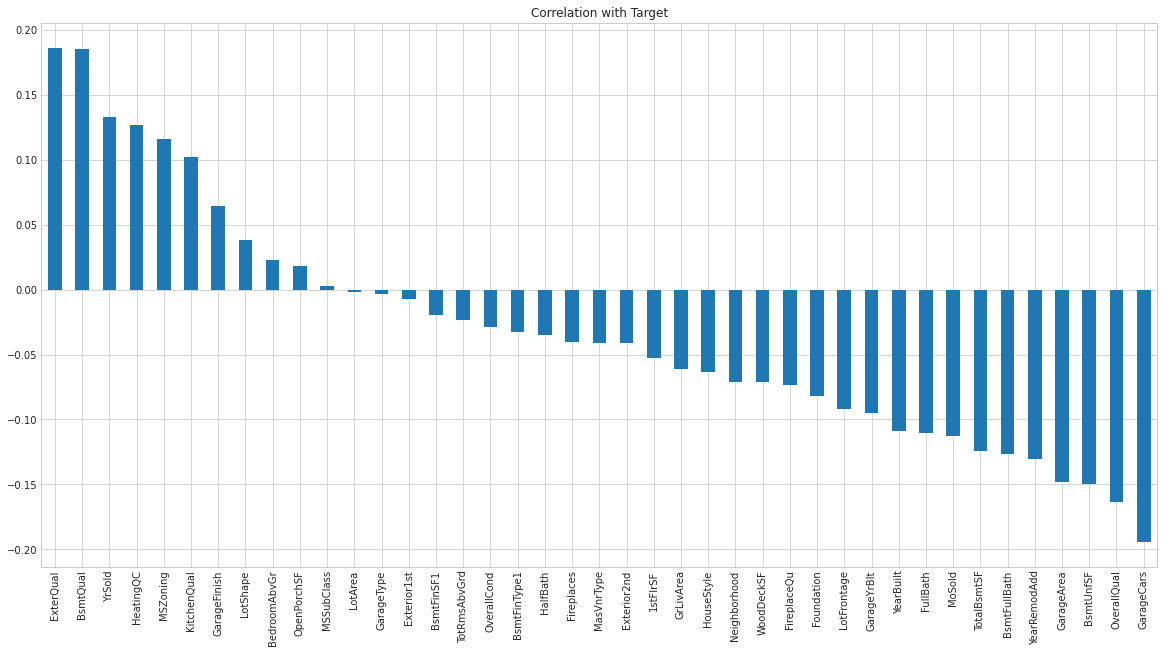

In [331]:
plt.figure(figsize=(20,10))
df2.corrwith(y).sort_values(ascending=False).plot(kind='bar',grid=True,title='Correlation with Target')


In [332]:
x_scaled=scaler.fit_transform(df2)

In [333]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif

vif      features
0    3.543739    MSSubClass
1    1.588983      MSZoning
2    2.216537   LotFrontage
3    2.719328       LotArea
4    1.394717      LotShape
5    1.504954  Neighborhood
6    2.419909    HouseStyle
7    4.439058   OverallQual
8    1.664070   OverallCond
9    7.930807     YearBuilt
10   3.241559  YearRemodAdd
11   5.059583   Exterior1st
12   5.208813   Exterior2nd
13   1.446100    MasVnrType
14   3.733085     ExterQual
15   3.935605    Foundation
16   2.930354      BsmtQual
17   3.135403  BsmtFinType1
18   8.285956    BsmtFinSF1
19   6.069618     BsmtUnfSF
20  12.309754   TotalBsmtSF
21   1.841850     HeatingQC
22   7.874254      1stFlrSF
23   9.959901     GrLivArea
24   2.264141  BsmtFullBath
25   3.460760      FullBath
26   3.385300      HalfBath
27   2.855733  BedroomAbvGr
28   2.330016   KitchenQual
29   4.639820  TotRmsAbvGrd
30   2.090937    Fireplaces
31   1.514466   FireplaceQu
32   1.847010    GarageType
33   4.444494   GarageYrBlt
34   2.246757  GarageFinish
35   8.414309    GarageCars
36   6.556436    GarageArea
37   1.585798    WoodDeckSF
38   1.427991   OpenPorchSF
39   1.265757        MoSold
40   1.165277        YrSold

In [336]:
## Predicting price
loaded=pickle.load(open(filename,'rb'))


In [337]:
price=loaded.predict(x_scaled)

In [340]:
Price=pd.DataFrame(price,columns=['Price'])

In [341]:
Price

Price
0    312990.266706
1    239373.928747
2    245304.391726
3    186692.989142
4    228771.501850
..             ...
248  231126.310281
249  141398.223707
250  152452.069208
251  182513.785516
252   96531.853386

[253 rows x 1 columns]